# <center>Développement d'une solution <em>big data</em><br>appliquée à l'analyse de données clients</center>

<div style = "text-align: center">© Florian FOLLAIN, 2023 — Tous droits réservés<br>Contact : <tt>follainflorian@gmail.com</tt><br>Dernière révision du document : mardi 23 mai 2023</div><br><br>

<div style = "text-align: justify">DataPro est une entreprise spécialisée dans l’analyse des données à grande échelle (<em>big data</em>). L’entreprise est bien connue dans le secteur depuis des années et a commencé à gagner la confiance de ses clients. L’entreprise dispose de plusieurs équipes : commercial, RH, <em>data scientists</em>, <em>data analysis</em>, développement et DevOps. GoldenLine, quant à elle, est une entreprise spécialisée dans les vêtements grande surface. Elle est implantée partout en France avec une estimation de trois millions de clients. À chaque passage en caisse, le client peut passer sa carte de fidélité. GoldenLine fait appel à DataPro pour l’aider à analyser les données clientèle. GoldenLine, souhaite ici le développement d’une solution web permettant de mieux visualiser les données. </div><br>
    
<div style = "text-align: justify">Les missions à effectuer sont les suivantes : analyse du projet, production des documents nécessaires au développement d’une application et développement de l’application. Afin de mener tout cela à bien, le responsable marketing de GoldenLine, qui en connaît les tenants et les aboutissants, esquisse un résumé de ce que le client attend. Le client souhaite, tout d’abord, une base de données afin de pouvoir stocker de l’information. Cette base de données devra stocker des données anonymisées client, c'est-à-dire un identifiant ainsi qu’une colonne contenant le nombre d’enfants, la catégorie socioprofessionnelle, le prix du panier client sur le jour du passage en caisse, le suivi d’un identifiant collecte. En ce qui concerne la collecte,  cette table aura l’identifiant de la collecte, mais détaillera le prix du panier client en fonction des catégories. Par exemple, si un client a acheté 25 euros d’alimentaire-multimédia pour 50 euros au total, alors le prix du panier est de 50 euros, on renseignera une catégorie alimentaire pour 25 euros de dépenses et une catégorie est multimédia pour 25 euros de dépenses également.</div><br>

<div style = "text-align: justify">GoldenLine a besoin d’une application permettant d’exploiter les données stockées dans cette base de données. Le responsable marketing de GoldenLine, de ce fait, vous indique que les besoins de l'entreprise sont de produire une application web permettant d’afficher, sous forme de graphique les dépenses par catégorie en fonction de la catégorie socioprofessionnelle ; la dépense du panier moyen en fonction de la catégorie socioprofessionnelle ; l’export des données (il faut pouvoir spécifier un nombre de lignes que l’on souhaite exporter de la base de données ; export uniquement de la table collecte). Enfin, l’équipe marketing a accès à cette application. Bien que cette application soit à destination de l’équipe marketing, il faut que l’administrateur autorise le salarié du marketing à accéder aux données.</div>

# Sommaire
* [1. Simulation des bases de données](#10)
    * [1.1. Création de la base de données clients](#11)
    * [1.2. Création de la base de données achats agrégés](#12)
    * [1.3. Création de la base de données des tickets de caisse](#13)
    * [1.4. Résumé de l'architecture du projet](#14)
* [2. Analyse des données](#20)
    * [2.1. Analyse de la dépense par secteur : statistiques descriptives](#21)
    * [2.2. Analyse de la dépense totale selon la CSP : ANOVA à un facteur](#22)
    * [2.3. Analyse de la dépense selon le secteur et la CSP : ANOVA à deux facteurs](#23)
    * [2.4. Quelques perspectives pour approfondir](#24)

In [1]:
import warnings                   # Empêche l'affichage de messages d'avertissement
warnings.filterwarnings('ignore') # qui brouillent la lecture du notebook Jupyter

# 1. Simulation des bases de données<a class = 'anchor' id = '10'></a>

## 1.1. Création de la base de données clients<a class = 'anchor' id = '11'></a>

<div style = "text-align: justify">Étant donné que le projet est fictif, on va devoir créer <em>ex nihilo</em> une base de données clients. Tâchons toutefois de la rendre la plus réaliste possible. L'objectif ici va donc être de créer une base de données contenant trois millions de lignes (la taille estimée du fichier clients de l'entreprise GoldenLine) grâce au <em>package</em> <tt>pandas</tt>. Celle-ci devra comporter les colonnes suivantes :<ol>
    <li><tt>NOM</tt> : le nom du client, extrait aléatoirement de la base des patronymes (nom de famille) utilisés en France, accessible depuis le site du gouvernement français au format <tt>CSV</tt> <a href="https://www.data.gouv.fr/fr/datasets/r/9ae80de2-a41e-4282-b9f8-61e6850ef449">ici</a>. Le nom de famille sera sélectionné parmi les noms utilisés au moins cent fois dans la base de données (patronyme "réaliste").</li>
   <li><tt>PRENOM</tt> : le prénom du client, extrait de la base des prénoms utilisés en France depuis le site du gouvernement français accessible au format <tt>CSV</tt> <a href="https://www.data.gouv.fr/fr/datasets/r/4b13bbf2-4185-4143-92d3-8ed5d990b0fa">ici</a>. Le prénom sera sélectionné parmi les noms utilisés au moins cent fois dans la base de données (prénom courant).</li>
   <li><tt>MAIL</tt> : l'adresse mail du client, que l'on simulera sous la forme <tt>prenom.nom@gmail.com</tt> ; on aurait pu utiliser d'autres fournisseurs d'accès mais cela ne rajouterait que de la complexité inutile.</li>
   <li><tt>ENFANTS</tt> : le nom d'enfants du client, qu'on supposera suivre une loi binomiale de paramètres 12 (on supposera en effet qu'il est difficile d'en avoir plus) et 0.1 (de sorte à ce que le nombre moyen d'enfants par personne vérifie 12 $\times$ 0.1 = 1.2, valeur réaliste).</li>
   <li><tt>CSP</tt> : la catégorie socioprofessionnelle (CSP) du client, selon la répartition suivante : 1 % agriculteurs exploitants, 5 % artisans, commerçants et chefs d'entreprise, 13 % de cadres, 13 % de professions intermédiaires, 8 % d'employés, 18 % d'ouvriers, 30 % de retraités, 12 % d'étudiants.</li>
</ol></div>

<div style = "text-align: justify">Quelles sont les limites d'une telle simulation ? Tout d'abord, on ne simule pas les âges de nos clients par rapport à l'entreprise : les entreprises de la tech ont naturellement des clients plus jeunes que celles de la grande distribution. Dès lors, la répartition des CSP au sein de notre fichier client, que l'on a supposé suivre celle de la population française générale, n'a pas de raison <em>a priori</em> de correspondre à celle de GoldenLine. Ceci étant dit, commençons par récupérer les bases de données des patronymes et des prénoms depuis le site du gouvernement.</div>

In [60]:
%%time
import pandas as pd

to_scrap = ['https://www.data.gouv.fr/fr/datasets/r/9ae80de2-a41e-4282-b9f8-61e6850ef449', 'https://www.data.gouv.fr/fr/datasets/r/4b13bbf2-4185-4143-92d3-8ed5d990b0fa']
database = ['NOMS', 'PRENOMS']
nb_min   = 100

for _ in range(5):
    try:
        for i in range(len(to_scrap)):
            db = pd.read_csv(to_scrap[i], sep = ',')
            db.columns = ['NOM', 'NOMBRE']
            db = db[db.NOMBRE >= nb_min]
            db.to_csv('%s.csv' %database[i])
        break
    except Exception:
        continue

CPU times: total: 344 ms
Wall time: 2.27 s


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code Python utilise la bibliothèque <tt>pandas</tt> pour récupérer et traiter des données provenant de deux pages Web spécifiques. La première ligne de code <tt>%%time</tt> est une commande magique qui permet de mesurer le temps d'exécution de tout le code. Ensuite, une liste appelée <tt>to_scrap</tt> est créée, qui contient les URL des pages à scraper. Une autre liste appelée <tt>database</tt> est créée, qui contient les noms des bases de données à créer à partir des données extraites. La variable <tt>nb_min</tt>, quant à elle, définit le seuil que les données doivent atteindre pour être considérées comme valides. Dans ce cas, les enregistrements ayant un nombre inférieur à 100 ne seront pas inclus dans les données finales. Le code utilise ensuite une boucle <tt>for</tt> pour itérer sur chaque URL dans <tt>to_scrap</tt>. Dans chaque itération, les données du fichier CSV correspondant à l'URL sont récupérées en utilisant la fonction <tt>pd.read_csv()</tt> de pandas. Les données sont ensuite traitées en renommant les colonnes <tt>NOM</tt> et <tt>NOMBRE</tt> et en supprimant les enregistrements avec un nombre inférieur à <tt>nb_min</tt>. Enfin, les données nettoyées sont exportées dans un fichier <tt>CSV</tt> portant le nom spécifié dans la liste <tt>database</tt>.</em></div>

<div style = "text-align: justify">Maintenant qu'on a récupéré les bases de données de noms et prénoms relativement courants, on va créer notre base de données de trois millions de lignes à partir des règles définies <em>supra</em>. Comme on va réaliser des simulations probabilistes, on aura besoin du <em>package</em> <tt>numpy</tt>. En particulier, la stratégie de création des noms est la suivante : on génère un vecteur aléatoire de trois millions d'entiers <tt>[n_0,...,n_k]</tt> compris entre 0 et la taille de la base des noms (moins 1, car <tt>Python</tt> commence à compter à partir de 0), nommée <tt>noms</tt>, puis on génère une liste aléatoire des prénoms par <tt>[noms[n_0],...noms[n_k]]</tt>. On procède de façon analogue pour générer aléatoirement des prénoms. Quid de la répartition des CSP qui doivent être aléatoirement générés ? Pour ce faire, on va générer trois millions de réels compris entre 0 et 1 comme une suite de variables aléatoires $U_0,\ldots,U_{2~999~999}$ identiquement distribués selon une loi uniforme sur l'intervalle [0,1]. On sait alors que, pour tous réels $x$ et $y$ compris entre 0 et 1 vérifiant $x\leq y$, on a $\mathbb{P}([x \leq U\leq y])=y-x$ (où $U$ est une variable aléatoire suivant une loi uniforme sur [0,1]). Par conséquent, la stratégie de simulation des CSP sera la suivante, pour tout individu $i$ compris entre 0 et 2 999 999 : <ol>
    <li>Si $U_i$ est inférieur à 0.01, ce qui survient dans 0.01 $-$ 0 = 1 % des cas, on supposera que l'individu $i$ est un agriculeur ;</li>
    <li>Si $U_i$ est compris entre 0.01 et 0.06, ce qui survient dans 0.06 $-$ 0.01 = 5 % des cas, on supposera que l'individu $i$ est un artisan ou apparenté ;</li>
    <li>Si $U_i$ est compris entre 0.06 et 0.19, ce qui survient dans 0.19 $-$ 0.06 = 13 % des cas, on supposera que l'individu $i$ est un cadre ;</li>
    <li>Si $U_i$ est compris entre 0.19 et 0.32, ce qui survient dans 0.32 $-$ 0.19 = 13 % des cas, on supposera que l'individu $i$ est une profession intermédiaire ;</li>
    <li>Si $U_i$ est compris entre 0.32 et 0.40, ce qui survient dans 0.40 $-$ 0.32 = 8 % des cas, on supposera que l'individu $i$ est un employé ;</li> 
    <li>Si $U_i$ est compris entre 0.40 et 0.58, ce qui survient dans 0.58 $-$ 0.40 = 18 % des cas, on supposera que l'individu $i$ est un ouvrier ;</li> 
    <li>Si $U_i$ est compris entre 0.58 et 0.88, ce qui survient dans 0.88 $-$ 0.58 = 30 % des cas, on supposera que l'individu $i$ est un retraité ;</li> 
    <li>Si $U_i$ est supérieur à 0.88, ce qui survient dans 1 $-$ 0.88 = 12 % des cas, on supposera que l'individu $i$ est un étudiant.</li>     
</ol></div>

In [3]:
%%time
import numpy as np

col1     = ['NOM', 'PRENOM', 'MAIL', 'ENFANTS', 'CSP']
client   = pd.DataFrame(columns = col1)
taille   = 20000

noms     = pd.read_csv('NOMS.csv')
noms     = noms.NOM
nom_pos  = np.random.randint(len(noms) - 1, size = taille)
nom_sim  = [noms[i] for i in nom_pos]

prenoms  = pd.read_csv('PRENOMS.csv')
prenoms  = prenoms.NOM
pre_pos  = np.random.randint(len(prenoms) - 1, size = taille)
pre_sim  = [prenoms[i].capitalize() for i in pre_pos]

csp      = np.random.rand(taille)
repart   = [csp < 0.01, (csp >= 0.01) & (csp < 0.06), (csp >= 0.06) & (csp < 0.19), (csp >= 0.19) & (csp < 0.32), (csp >= 0.32) & (csp < 0.40), (csp >= 0.40) & (csp < 0.58), (csp >= 0.58) & (csp < 0.88), csp >= 0.88]
csp_list = ['Agriculteur', 'Artisan et apparentés', 'Cadre', 'Profession intermédiaire', 'Employé', 'Ouvrier', 'Retraité', 'Étudiant']
csp_sim  = np.select(repart, csp_list, 'Non renseigné')

client['NOM']     = nom_sim
client['PRENOM']  = pre_sim
client['MAIL']    = client['PRENOM'].apply(str.lower).str.replace(' ', '-') + '.' + client['NOM'].apply(str.lower).str.replace(' ', '') + '@gmail.com'
client['ENFANTS'] = np.random.binomial(12, 0.1, taille)
client['CSP']     = csp_sim

client.head(10)

CPU times: total: 141 ms
Wall time: 369 ms


,NOM,PRENOM,MAIL,ENFANTS,CSP
0,FONTENELLE,Verena,verena.fontenelle@gmail.com,1,Cadre
1,LAMIRAND,Andres,andres.lamirand@gmail.com,1,Ouvrier
2,DOUAUD,Fausto,fausto.douaud@gmail.com,1,Étudiant
3,LAIGLE,Svetlana,svetlana.laigle@gmail.com,2,Retraité
4,FORTUNATO,Kada,kada.fortunato@gmail.com,0,Profession intermédiaire
5,MOULA,Annita,annita.moula@gmail.com,1,Étudiant
6,HERMANT,Ismael,ismael.hermant@gmail.com,2,Employé
7,BOULAND,Nadir,nadir.bouland@gmail.com,0,Ouvrier
8,VOUILLON,Gabr,gabr.vouillon@gmail.com,0,Cadre
9,DUJARDIN,Isaline,isaline.dujardin@gmail.com,1,Cadre


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Tout d'abord, un <em>data frame</em> vide appelé <tt>client</tt> est créé avec des colonnes nommées <tt>NOM</tt>, <tt>PRENOM</tt>, <tt>MAIL</tt>, <tt>ENFANTS</tt> et <tt>CSP</tt>. Ensuite, le programme charge les noms et les prénoms depuis des fichiers CSV (<tt>NOMS.csv</tt> et <tt>PRENOMS.csv</tt>) et en tire aléatoirement une sélection pour les noms et les prénoms des clients (le retour à l'aléatoire est permis grâce au <em>package</em> <tt>numpy</tt>). La CSP (catégorie socio-professionnelle) est également générée aléatoirement à partir d'un tableau de répartition des CSP et d'un vecteur aléatoire. Plus précisément, la commande <tt>np.select</tt> est utilisée pour assigner des valeurs à une série de valeurs en fonction de plusieurs conditions simultanées. Elle prend deux arguments : une liste de conditions booléennes, chacune correspondant à une valeur à assigner, d'une part, et une liste de valeurs correspondantes à chaque condition d'autre part. La fonction <tt>np.select</tt> évalue chaque condition séquentiellement et assigne la première valeur pour laquelle la condition est évaluée comme vraie. Si aucune des conditions n'est vraie, la valeur par défaut est assignée (qui est la valeur par défaut spécifiée comme troisième argument de la fonction). Dans le code rédigé, la fonction <tt>np.select</tt> est utilisée pour affecter une CSP à chaque client en fonction de la valeur de son nombre aléatoire compris entre 0 et 1. Les intervalles de valeur sont définis dans la liste <tt>repart</tt> et les catégories sont spécifiées dans la liste <tt>csp_list</tt>. La valeur par défaut est <tt>Non renseigné</tt>. La fonction <tt>np.select</tt> évalue alors chaque intervalle de valeur en ordre croissant, assignant la catégorie correspondante pour le premier intervalle de valeur dans lequel la valeur aléatoire tombe. Enfin, la base de données fictive est créée en utilisant les noms, prénoms, adresses e-mail, nombre d'enfants et CSP générés précédemment. Par ailleurs, l'appel à la méthode <tt>head()</tt> sur le <em>data frame</em> <tt>client</tt> permet d'afficher les dix premières lignes de la base de données.</em></div>

<div style = "text-align: justify">Reste à anonymiser la base de données clients. On recourera pour cela au <em>package</em> <tt>hashlib</tt> qui nous permettra de créer un identifiant client unique à partir de l'adresse mail, qu'on sauvegardera dans une colonne <tt>ID</tt> de la base de données clients. Cette stratégie d'anonymisation est bien performante. En effet, le <em>package</em> <tt>hashlib</tt> recourt à l'algorithme SHA256 qui est asymétrique : si on connaît une valeur $x$, on peut en déduire la valeur $y$ hashée de $x$ ; en revanche, si l'on connaît $y$, on ne peut remonter à la valeur initiale de $x$ (cela repose sur le fait que la "fonction" de hashage est en réalité une correspondance et n'est donc pas bijective). Attention, cette base de données nous permet de rapprocher chaque achat d'une personne "réelle", puisque la base clients comportera à la fois le nom, le prénom et l'identifiant : il ne faudra donc pas que cette base de données soit accessible à tous les services. On fournira alors une base de données anonymisée dans laquelle seront supprimées les deux premières colonnes.</div>

In [4]:
%%time
import hashlib

client['ID'] = client['MAIL'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
anonyme      = client[['ID', 'ENFANTS', 'CSP']]
client.to_csv('Base de données clients complète.csv')
anonyme.to_csv('Base de données clients anonymisée.csv')

anonyme.head(10)

CPU times: total: 297 ms
Wall time: 502 ms


,ID,ENFANTS,CSP
0,91382bee7adbfce20c5bd8aa69b5128964fa1f238d586f...,1,Cadre
1,e70a620f8bb4c034bc2322b6bd216198a4d77d4e37167d...,1,Ouvrier
2,fa6ed987ae925e93d21063064c7a5a8312646254a01fa0...,1,Étudiant
3,dc25230e449fd2db1a4d16f2021b5b7e49c8b19cb5c175...,2,Retraité
4,8853782e665a106e852de4d5d8428e7c999899c33a5d17...,0,Profession intermédiaire
5,3bd25dad0da516d47eef6dfacc74c68eda0de5b8a92989...,1,Étudiant
6,cdbea0da7bdbe21c8302866b83c46f79b3cc301173c333...,2,Employé
7,6f789405ab595b5cdc857e07fd1ba779b955ab5180b781...,0,Ouvrier
8,6200e0dfd79c2a681bfa305682df7ba285c6ca22c73ecb...,0,Cadre
9,e582950a5d40bd167911e7d399205b8ef3afe90167a675...,1,Cadre


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code utilise la librairie Python <tt>hashlib</tt> pour créer un identifiant unique pour chaque client à partir de leur adresse e-mail. Après avoir importé la librairie susmentionnée, le code établit un nouvel identifiant unique pour chaque client dans la colonne <tt>ID</tt> de la table <tt>client</tt>. Cet identifiant est donc créé en prenant la valeur de la colonne <tt>MAIL</tt> de chaque client, au travers d'un encodage utilisant l'algorithme de hachage SHA-256, puis en le convertissant en une chaîne de caractères hexadécimaux. La ligne suivante du code crée alors une nouvelle table <tt>anonyme</tt> qui ne contient que les colonnes <tt>ID</tt>, <tt>ENFANTS</tt> et <tt>CSP</tt> de la table <tt>client</tt>. Cette table ne contient donc plus l'adresse e-mail, le nom et le prénom des clients, pour des raisons de confidentialité. On peut alors enregistrer les tables <tt>client</tt> et <tt>anonyme</tt> sous forme de fichiers <tt>CSV</tt>, respectivement nommés <tt>Base de données clients complète.csv</tt> et <tt>Base de données clients anonymisée.csv</tt>.</em></div>

## 1.2. Création de la base de données achats agrégées<a class = 'anchor' id = '12'></a>

<div style = "text-align: justify">L'objectif est à présent de simuler des factures. La première étape est de simuler le nombre d'achats réalisés pour chaque client de la base de données par année (par exemple). Imaginons que ce nombre correspondent à une loi binomiale de paramètres 5 et 0.1 (de sorte à ce qu'un client achète une fois tous les deux ans en moyenne). La première des étapes est donc de générer un vecteur correspondant au nombre de fois où chaque client apparaît dans la base de données.</div>

In [5]:
%%time
ID = []

for client_id in anonyme['ID']:
    ID.extend([client_id for i in range(np.random.binomial(5, 0.1, 1)[0])])

CPU times: total: 62.5 ms
Wall time: 101 ms


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Le code commence par initialiser une liste vide appelée <tt>ID</tt>. Ensuite, pour chaque <tt>client_id</tt> dans la colonne <tt>ID</tt> du DataFrame appelé <tt>anonyme</tt>, le code utilise la fonction <tt>np.random.binomial()</tt> pour générer un nombre aléatoire de clients supplémentaires. Le nombre de clients supplémentaires est déterminé par la distribution binomiale avec une probabilité de succès de 0,1 et un nombre d'essais de 5. Ensuite, la boucle ajoute le <tt>client_id</tt> actuel autant de fois que le nombre de clients supplémentaires générés aléatoirement. Cette boucle se termine en mettant à jour la liste <tt>ID</tt> avec les nouvelles valeurs générées. Finalement, la liste <tt>ID</tt> contiendra le même nombre d'éléments que le nombre total de clients, chaque élément représentant l'ID du client correspondant, mais répété un certain nombre de fois en fonction de la distribution binomiale aléatoire générée pour ce client.</em></div>

<div style = "text-align: justify">C'est ce vecteur d'apparition client qui va définir le nombre de lignes de notre base de données d'achat. On va tout d'abord générer un identifiant de collecte (c'est-à-dire une sorte de numéro de facture) de façon aléatoire. On considèrera que cet identifiant de collecte est un unique entier aléatoire entre 10 000 000 et 99 999 999 ; pour cela, on utilisera le <em>package</em> <tt>random</tt>. On pourra alors, pour chacune des lignes, générer un prix fictif du ticket de caisse, qu'on supposera suivre une loi normale d'espérance 70 (panier moyen supposé des achats) et d'écart-type 10 (et dont on imposera qu'il prenne une valeur positive). Naturellement, cette valeur-prix devra être arrondie au cent près. On supposera que les identifiants de collecte permettent de classer chronologiquement les opérations : un identifiant de collecte plus élevé correspondra à un achat plus récent. Lorsqu'on générera la base de données des achats, on choisira les classer par ordre chronologique croissant.</div>

In [6]:
%%time
import random
import datetime

collecte = random.sample(range(10000000, 99999999), len(ID))
prix     = abs(np.random.normal(70, 10, len(ID)).round(2))
col2     = ['COLLECTE', 'PRIX', 'ID']
achats   = pd.DataFrame(columns = col2)
achats['COLLECTE'] = collecte
achats['PRIX']     = prix
achats['ID']       = ID
achats.sort_values(by = ['COLLECTE'], ignore_index = True, inplace = True)

start_date     = datetime.datetime(2020, 1, 1)
end_date       = datetime.datetime.now().date()
date_range     = pd.date_range(start_date, end_date)
random_dates   = random.choices(date_range, k=len(ID))
random_dates   = sorted(random_dates)
achats['DATE'] = random_dates
achats['DATE'] = pd.to_datetime(achats['DATE'])
achats = achats[['DATE', 'COLLECTE', 'PRIX', 'ID']]

achats.to_csv('Base de données achats.csv')
achats.head(10)

CPU times: total: 78.1 ms
Wall time: 404 ms


,DATE,COLLECTE,PRIX,ID
0,2020-01-01,10010608,74.74,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...
1,2020-01-01,10012031,75.70,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...
2,2020-01-01,10021667,74.60,85a636a096d28a0b48c675a07df926dc38506788bc80df...
3,2020-01-01,10027251,66.81,feedb90403eb4d9f72dc72ae85a8d64620bba737993c35...
4,2020-01-01,10038824,62.68,16fce7d714bc799d170571115d6d0e7e250c60b48c5778...
5,2020-01-01,10041490,75.43,64e9112ee023851eaa0f7471029bb4b33c2ec537ee5bec...
6,2020-01-01,10043795,65.35,5f06a739af937d291521d865f85cfffc80dc2edf13ed1a...
7,2020-01-01,10049413,71.61,d4d0e8b2bb0ece4d9bf10d9bfe1f5407c870117a42759a...
8,2020-01-01,10055642,86.66,8fc0a5a7e1ab1a58b7047a457796d61c6401ad0ff9aa9b...
9,2020-01-02,10065753,76.81,94dd5253ff8bcbafa881192d9e34370068ae857d2db98c...


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Le code commence par importer le module <tt>random</tt>, qui sera utilisé pour générer des échantillons aléatoires. Ensuite, le code utilise la fonction <tt>random.sample()</tt> pour générer une liste aléatoire d'éléments distincts de huit chiffres, qui représenteront les numéros de collecte pour chaque achat (c'est une sorte de numéro de facture, pourrait-on dire). Le code utilise également la fonction <tt>np.random.normal()</tt> pour générer une liste de prix aléatoires pour chaque achat, avec une moyenne de 70 et un écart-type de 10. Ces prix sont arrondis à 2 décimales à l'aide de la fonction <tt>round()</tt>. Le code crée par la suite un nouveau <em>data frame</em> appelé <tt>achats</tt> avec les colonnes <tt>COLLECTE</tt>, <tt>PRIX</tt> et <tt>ID</tt>. Les colonnes <tt>COLLECTE</tt> et <tt>PRIX</tt> sont remplies avec les listes aléatoires générées précédemment, tandis que la colonne <tt>ID</tt> est remplie avec les identifiants de clients générés plus tôt. Enfin, le code trie le <em>data frame</em> <tt>achats</tt> par ordre croissant de collecte à l'aide de la fonction <tt>sort_values()</tt>, puis enregistre celui-ci dans un fichier <tt>CSV</tt> nommé <tt>Base de données achats.csv</tt>.</em></div>

In [7]:
%%time
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, Javascript


start_date_picker = widgets.DatePicker(description = 'Date de début', value = start_date)
end_date_picker   = widgets.DatePicker(description = 'Date de fin',   value = end_date)
generate_button   = widgets.Button(description = 'Générer')

def generate_database(button):
    
    selected_start = pd.to_datetime(start_date_picker.value)
    selected_end   = pd.to_datetime(end_date_picker.value)
    selected_achat = achats[(achats['DATE'] >= selected_start) & (achats['DATE'] <= selected_end)]
    s_yy = selected_start.year
    s_mm = selected_start.month
    s_dd = selected_start.day
    e_yy = selected_end.year
    e_mm = selected_end.month
    e_dd = selected_end.day
    selected_achat.to_csv('BDD achats (%s-%s-%s to %s-%s-%s).csv' %(s_yy, s_mm, s_dd, e_yy, e_mm, e_dd))
    
    display(selected_achat)

display(start_date_picker, end_date_picker, generate_button)
generate_button.on_click(generate_database)

DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Date de début', step=1)

DatePicker(value=datetime.date(2023, 5, 23), description='Date de fin', step=1)

Button(description='Générer', style=ButtonStyle())

CPU times: total: 78.1 ms
Wall time: 213 ms


## 1.3. Création de la base de données des tickets de caisse<a class = 'anchor' id = '13'></a>

<div style = "text-align: justify">On doit pour finir générer le <em>breakdown</em> de chaque ticket de caisse en fonction des différentes catégories de produits vendus dans le magasin, spécialisé rappelons-le dans le vente de vêtements. On va distinguer entre quatre catégories : alimentaire, vêtements, maison et hygiène, qu'on suppose être les secteurs de prédilection de GoldenLine. La stratégie de génération aléatoire des répartitions des achats est la suivante : on va générer, pour chaque ticket de caisse, quatre nombres aléatoires $x_1$, $x_2$, $x_3$ et $x_4$ compris entre 0 et 1 d'après une loi uniforme sur [0,1]. Dès lors, $x_1/(x_1+\cdots+x_4)$ (resp. $x_2/(x_1+\cdots+x_4)$, $x_3/(x_1+\cdots+x_4)$ et $x_4/(x_1+\cdots+x_4)$) représentera la part de l'alimentaire (resp. des vêtements, des produits liés à la maison et des produits d'hygiène) dans le ticket de caisse. En effet, la somme de ces quatre noms valant 1, on peut bien les assimiler à des pondérations.</div>

In [8]:
%%time
x1 = np.random.rand(len(ID))
x2 = np.random.rand(len(ID))
x3 = np.random.rand(len(ID))
x4 = np.random.rand(len(ID))

details = achats[['COLLECTE', 'PRIX']]
details['ALIMENTAIRE'] = (x1 * details['PRIX'] / (x1 + x2 + x3 + x4)).round(2)
details['VETEMENTS']   = (x2 * details['PRIX'] / (x1 + x2 + x3 + x4)).round(2)
details['MAISON']      = (x3 * details['PRIX'] / (x1 + x2 + x3 + x4)).round(2)
details['HYGIENE']     = details['PRIX'] - details['ALIMENTAIRE'] - details['VETEMENTS'] - details['MAISON']
details = details.drop(['PRIX'], axis = 1)
details.to_csv('Base de données détails des factures.csv')

details.head(10)

CPU times: total: 62.5 ms
Wall time: 183 ms


,COLLECTE,ALIMENTAIRE,VETEMENTS,MAISON,HYGIENE
0,10010608,22.18,23.26,4.41,24.89
1,10012031,22.17,9.93,29.26,14.34
2,10021667,32.05,23.49,5.05,14.01
3,10027251,9.80,13.33,22.42,21.26
4,10038824,17.04,6.63,14.26,24.75
5,10041490,28.71,22.25,17.13,7.34
6,10043795,16.80,0.51,28.68,19.36
7,10049413,24.71,12.96,19.56,14.38
8,10055642,21.56,49.42,14.66,1.02
9,10065753,34.97,12.55,12.45,16.84


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code crée un <em>data frame</em> appelé <tt>details</tt> qui contient des informations sur les achats effectués, en particulier le montant dépensé dans chaque catégorie de produits. Pour ce faire, le code commence par créer quatre séries de nombres aléatoires appelées <tt>x1</tt>, <tt>x2</tt>, <tt>x3</tt> et <tt>x4</tt> en utilisant la fonction <tt>np.random.rand()</tt>. Ensuite, le code utilise ces séries pour calculer le montant dépensé dans chaque catégorie de produits (alimentaire, vêtements, maison, hygiène) pour chaque achat, attendu que les valeurs $x_i/(x_1+x_2+x_3+x_4)$ représentent des pondérations (voir <em>supra</em>). Le code ajoute ensuite ces montants dépensés pour chaque catégorie de produits en tant que nouvelles colonnes du <em>data frame</em> <tt>details</tt>, puis il supprime la colonne <tt>PRIX</tt> pour ne garder que les colonnes contenant les montants dépensés pour chaque catégorie de produits et les dates de collecte des achats. Finalement, le code enregistre ce nouveau <em>data frame</em> dans un fichier <tt>CSV</tt> nommé <tt>Base de données détails des factures.csv</tt>.</em></div>

## 1.4. Résumé de l'architecture du projet<a class = 'anchor' id = '14'></a>

<div style = "text-align: justify">Quelles informations fournir à l'équipe de <em>data science</em> ? Nous disposons de trois bases de données au total : une base de données clients anonymisée (<tt>anonyme</tt>), accessible notamment à l'équipe marketing, une base de données des achats réalisés (<tt>achats</tt>), accessible par exemple aux équipes de ventes, et une base de données du détail des factures (<tt>details</tt>), accessible par exemple au service comptabilité. Dessinons les relations qu'entretiennent ces trois bases de données en dessinant leur schéma entités-associations (<em>entity-relationship diagram</em>, ERD). Pour cela, on aura besoin du <em>package</em> <tt>pandaserd</tt> qui permet de dessiner un ERD à partir de bases de données <tt>pandas</tt>, et du <em>package</em> <tt>graphviz</tt> qui permet de visualiser les ERD (à installer via <tt>conda</tt> sous macOS ou Linux et via <tt>pip</tt> sous Windows).</div>

In [52]:
#pip install pandaserd

In [53]:
#pip install graphviz

<div style = "text-align: justify">L'architecture des bases de données est alors la suivante :</div>

In [11]:
%%time
from pandaserd import ERD
from graphviz  import Source

erd = ERD()
t1  = erd.add_table(anonyme, 'CLIENTS', bg_color = 'grey')
t2  = erd.add_table(achats,  'ACHATS',  bg_color = 'skyblue')
t3  = erd.add_table(details, 'DETAILS', bg_color = 'lightblue')
erd.create_rel('CLIENTS', 'ACHATS', on = 'ID',       left_cardinality = '+', right_cardinality = '*')
erd.create_rel('ACHATS', 'DETAILS', on = 'COLLECTE', left_cardinality = '+', right_cardinality = '+')

path = 'Relations entre BDD.txt'
erd.write_to_file(path)
#Source.from_file(path)

written to Relations entre BDD.txt; visit https://edotor.net/ to render ERD
CPU times: total: 78.1 ms
Wall time: 166 ms


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code permet de créer un diagramme entité-relation (ERD) pour représenter les relations entre trois tables de bases de données : <tt>CLIENTS</tt>, <tt>ACHATS</tt> et <tt>DETAILS</tt>. Tout d'abord, le code importe les librairies nécessaires : <tt>pandaserd</tt> pour créer le diagramme et <tt>graphviz</tt> pour le visualiser. Ensuite, il initialise l'objet ERD, puis ajoute les trois tables au diagramme, avec une couleur différente pour chacune : <tt>grey</tt> pour <tt>CLIENTS</tt>, <tt>skyblue</tt> pour <tt>ACHATS</tt> et <tt>lightblue</tt> pour <tt>DETAILS</tt>. Ensuite, il spécifie les relations entre les différentes tables : la première entre <tt>CLIENTS</tt> et <tt>ACHATS</tt>, en spécifiant que la colonne <tt>ID</tt> de <tt>CLIENTS</tt> est utilisée pour lier les deux tables, et que chaque client peut avoir plusieurs achats (<tt>+</tt> côté <tt>CLIENTS</tt> et <tt>*</tt> côté <tt>ACHATS</tt> : relation <em>one-to-many</em>). La seconde relation est entre <tt>ACHATS</tt> et <tt>DETAILS</tt>, en utilisant la colonne <tt>COLLECTE</tt> de <tt>ACHATS</tt> pour lier les deux tables, et en spécifiant que chaque achat est associé à un et un seul détail (<tt>+</tt> côté <tt>ACHATS</tt> et <tt>+</tt> côté <tt>DETAILS</tt> : relation <em>one-to-one</em>). Enfin, le code enregistre le diagramme dans un fichier texte et le visualise avec la librairie <tt>graphviz</tt>.</em></div>

<div style = "text-align: justify">Il convient donc, pour la base de données des détails des factures, de rapprocher l'identifiant client à chaque identifiant de collecte grâce à la base de données des achats puis, étant donné qu'on dispose de l'identifiant client, de rapprocher le nombre d'enfants et la CSP à l'aide de la base de données clients anonymisée.</div>

In [41]:
%%time
complete = details.merge(achats,   left_on = 'COLLECTE', right_on = 'COLLECTE')
complete = complete.merge(anonyme, left_on = 'ID',       right_on = 'ID')
complete = complete[['DATE','COLLECTE', 'ID', 'CSP', 'ENFANTS', 'PRIX', 'ALIMENTAIRE', 'VETEMENTS', 'MAISON', 'HYGIENE']]
complete.sort_values(by = ['COLLECTE'], ignore_index = True, inplace = True)
complete.to_csv('Base de données complète anonymisée.csv')

complete.head(10)

CPU times: total: 312 ms
Wall time: 623 ms


,DATE,COLLECTE,ID,CSP,ENFANTS,PRIX,ALIMENTAIRE,VETEMENTS,MAISON,HYGIENE
0,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,22.18,23.26,4.41,24.89
1,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,22.17,9.93,29.26,14.34
2,2020-01-01,10021667,85a636a096d28a0b48c675a07df926dc38506788bc80df...,Étudiant,1,74.60,32.05,23.49,5.05,14.01
3,2020-01-01,10027251,feedb90403eb4d9f72dc72ae85a8d64620bba737993c35...,Employé,1,66.81,9.80,13.33,22.42,21.26
4,2020-01-01,10038824,16fce7d714bc799d170571115d6d0e7e250c60b48c5778...,Retraité,0,62.68,17.04,6.63,14.26,24.75
5,2020-01-01,10041490,64e9112ee023851eaa0f7471029bb4b33c2ec537ee5bec...,Étudiant,0,75.43,28.71,22.25,17.13,7.34
6,2020-01-01,10043795,5f06a739af937d291521d865f85cfffc80dc2edf13ed1a...,Cadre,0,65.35,16.80,0.51,28.68,19.36
7,2020-01-01,10049413,d4d0e8b2bb0ece4d9bf10d9bfe1f5407c870117a42759a...,Retraité,1,71.61,24.71,12.96,19.56,14.38
8,2020-01-01,10055642,8fc0a5a7e1ab1a58b7047a457796d61c6401ad0ff9aa9b...,Étudiant,3,86.66,21.56,49.42,14.66,1.02
9,2020-01-02,10065753,94dd5253ff8bcbafa881192d9e34370068ae857d2db98c...,Profession intermédiaire,2,76.81,34.97,12.55,12.45,16.84


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code permet de fusionner les données de trois tables de bases de données pour créer une base de données complète anonymisée. La première ligne crée une nouvelle table appelée <tt>complete</tt> en fusionnant les tables <tt>details</tt> et <tt>achats</tt> en utilisant la colonne <tt>COLLECTE</tt> pour lier les deux tables. Cela signifie que les détails de chaque achat sont associés à l'achat correspondant. La ligne suivante ajoute les informations des clients à la table <tt>complete</tt> ainsi créée en utilisant la colonne <tt>ID</tt> pour lier les tables <tt>complete</tt> et <tt>anonyme</tt>. Cela permet de récupérer les informations sur chaque client associé à chaque achat. La ligne qui suit sélectionne alors les colonnes de la table <tt>complete</tt> dans l'ordre souhaité et trie les données par ordre chronologique de la colonne <tt>COLLECTE</tt>. On peut alors enregistrer la base de données complète anonymisée dans un fichier <tt>CSV</tt>.</em></div>

In [46]:
%%time
start_date_picker2 = widgets.DatePicker(description = 'Date de début', value = start_date)
end_date_picker2   = widgets.DatePicker(description = 'Date de fin',   value = end_date)
generate_button2   = widgets.Button(description = 'Générer')

def generate_database2(button):

    selected_start = pd.to_datetime(start_date_picker.value)
    selected_end   = pd.to_datetime(end_date_picker.value)
    selected_compl = complete[(complete['DATE'] >= selected_start) & (complete['DATE'] <= selected_end)]
    s_yy = selected_start.year
    s_mm = selected_start.month
    s_dd = selected_start.day
    e_yy = selected_end.year
    e_mm = selected_end.month
    e_dd = selected_end.day
    selected_compl.to_csv('BDD complète (%s-%s-%s to %s-%s-%s).csv' %(s_yy, s_mm, s_dd, e_yy, e_mm, e_dd))
    
    display(selected_compl)
    
display(start_date_picker2, end_date_picker2, generate_button2)
generate_button2.on_click(generate_database2)


DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Date de début', step=1)

DatePicker(value=datetime.date(2023, 5, 23), description='Date de fin', step=1)

Button(description='Générer', style=ButtonStyle())

CPU times: total: 31.2 ms
Wall time: 25.4 ms


,DATE,COLLECTE,ID,CSP,ENFANTS,PRIX,ALIMENTAIRE,VETEMENTS,MAISON,HYGIENE
0,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,22.18,23.26,4.41,24.89
1,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,22.17,9.93,29.26,14.34
2,2020-01-01,10021667,85a636a096d28a0b48c675a07df926dc38506788bc80df...,Étudiant,1,74.60,32.05,23.49,5.05,14.01
3,2020-01-01,10027251,feedb90403eb4d9f72dc72ae85a8d64620bba737993c35...,Employé,1,66.81,9.80,13.33,22.42,21.26
4,2020-01-01,10038824,16fce7d714bc799d170571115d6d0e7e250c60b48c5778...,Retraité,0,62.68,17.04,6.63,14.26,24.75
...,...,...,...,...,...,...,...,...,...,...
9828,2023-05-23,99958396,8efd49b9a89233439ab8dead3b3774d7707ba37fb3b666...,Retraité,1,74.65,22.01,14.47,29.98,8.19
9829,2023-05-23,99972904,c1d0ede514b51e55022bb6fa437ebc86293bbbbf646ea1...,Cadre,1,75.26,24.80,3.72,4.97,41.77
9830,2023-05-23,99979375,062cb346ff9733fd954d931af89766692dd6013bd77b9d...,Ouvrier,1,69.51,28.41,4.98,11.63,24.49
9831,2023-05-23,99984012,97c0ebd16ef53bb4b50b01f896ff895967306d6e0c70b7...,Étudiant,0,71.85,8.97,26.10,32.14,4.64


# 2. Analyse des données<a class = 'anchor' id = '20'></a>

## 2.1. Analyse de la dépense par secteur : statistiques descriptives<a class = 'anchor' id = '21'></a>

<div style = "text-align: justify">Nous avons choisi de distinguer entre quatre segments de vente pour GoldenLine : alimentaire, vêtements, maison et hygiène. Comment se répartit la dépense moyenne au sein de notre jeu de données ? Un histogramme permettrait de visualiser cette question. On utilisera pour cela le <em>package</em> <tt>seaborn</tt>. Mais le problème de notre base de données initiale est qu'elle comporte quatre colonnes pour chacune des quatre segments. Or, pour représenter un histogramme groupé, on a plutôt besoin de deux colonnes : l'une indiquant le segment / groupe (alimentaire, vêtements, maison ou hygiène) et l'autre le montant de la dépense ; il faut donc transformer notre base de données. C'est là qu'intervient la fonction <tt>melt()</tt> du <em>package</em> <tt>pandas</tt> : celle-ci est utilisée pour transformer un <em>data frame</em> à partir d'un format large à un format long. Cela signifie que la fonction prend un <em>data frame</em> où les variables sont stockées dans les colonnes et les observations dans les lignes, et la transforme en un <em>data frame</em> où les variables sont stockées dans une colonne et les valeurs correspondantes dans une autre colonne. En d'autres termes, la fonction <tt>pandas.melt()</tt> permet de regrouper plusieurs colonnes en une seule et de créer une nouvelle colonne pour stocker les valeurs correspondantes. Elle est donc souvent utilisée pour faciliter l'analyse et la visualisation des données, en particulier lorsqu'on souhaite utiliser des graphiques ou des tableaux croisés dynamiques.</div>

In [14]:
%%time
melted_db = pd.melt(complete, id_vars = ['DATE','COLLECTE', 'ID', 'CSP', 'ENFANTS', 'PRIX'], var_name = 'SECTEUR', value_name = 'DEPENSE')
melted_db.sort_values(by = ['COLLECTE'], ignore_index = True, inplace = True)
melted_db.to_csv('Base de données complète (long).csv')

melted_db.head(10)

CPU times: total: 859 ms
Wall time: 1.28 s


,DATE,COLLECTE,ID,CSP,ENFANTS,PRIX,SECTEUR,DEPENSE
0,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,ALIMENTAIRE,22.18
1,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,VETEMENTS,23.26
2,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,HYGIENE,24.89
3,2020-01-01,10010608,073e3da5d78f227daae524a08ed6f36e7f4839d7d942bf...,Profession intermédiaire,1,74.74,MAISON,4.41
4,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,VETEMENTS,9.93
5,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,ALIMENTAIRE,22.17
6,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,MAISON,29.26
7,2020-01-01,10012031,79752a29e20c4f1f7ddfe97c085d1d90b68dd3b864b46f...,Cadre,1,75.70,HYGIENE,14.34
8,2020-01-01,10021667,85a636a096d28a0b48c675a07df926dc38506788bc80df...,Étudiant,1,74.60,VETEMENTS,23.49
9,2020-01-01,10021667,85a636a096d28a0b48c675a07df926dc38506788bc80df...,Étudiant,1,74.60,ALIMENTAIRE,32.05


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> La fonction <tt>pandas.melt()</tt> prend en entrée le <em>data frame</em> <tt>complete</tt> et permet de regrouper plusieurs colonnes (toutes celles qui ne sont pas mentionnées dans la liste de variables <tt>id_vars</tt>) en une seule, en créant deux nouvelles colonnes : une pour les noms de variables (<tt>var_name</tt>), correspondant au groupe / segment, et une pour les valeurs correspondantes (<tt>value_name</tt>). Dans ce cas précis, le <em>data frame</em> <tt>melted_db</tt> est créée pour stocker le nouveau tableau de données ainsi généré. Les colonnes <tt>COLLECTE</tt>, <tt>ID</tt>, <tt>CSP</tt>, <tt>ENFANTS</tt> et <tt>PRIX</tt> sont préservées en tant que variables d'identification (<tt>id_vars</tt>), tandis que les colonnes restantes sont fusionnées en une seule colonne <tt>SECTEUR</tt> (<tt>var_name</tt>) et leur contenu stocké dans la colonne <tt>DEPENSE</tt> (<tt>value_name</tt>).</em></div>

CPU times: total: 4.36 s
Wall time: 13.3 s


<AxesSubplot: xlabel='DEPENSE', ylabel='Count'>

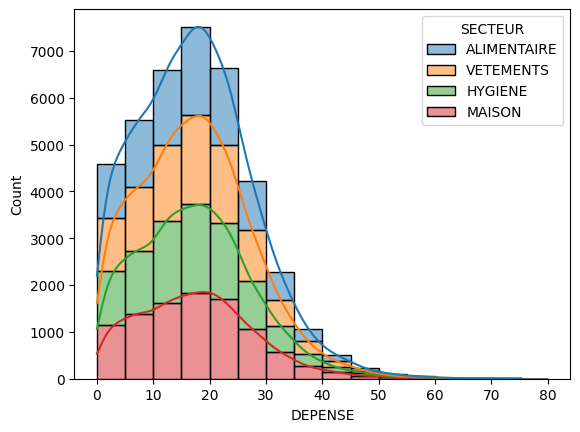

In [15]:
%%time
import seaborn as sns

sns.histplot(x = melted_db['DEPENSE'], hue = melted_db['SECTEUR'], kde = True, multiple = 'stack', binwidth = 5, shrink = 1)

<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ces lignes de code utilisent la librairie <tt>seaborn</tt>, au travers de la fonction <tt>sns.histplot()</tt> pour créer un histogramme avec des informations sur les dépenses des clients, pour chaque secteur de dépenses. Dans la fonction <tt>sns.histplot()</tt>, <tt>x</tt> spécifie la colonne des valeurs à afficher sur l'axe horizontal de l'histogramme : ici, la colonne <tt>DEPENSE</tt> de la variable <tt>melted_db</tt> est utilisée. Le paramètre <tt>hue</tt>, quant à lui, permet de distinguer les différentes catégories de données, ici les secteurs de dépenses : la colonne <tt>SECTEUR</tt> de la base <tt>melted_db</tt> est utilisée. De plus, le paramètre <tt>kde</tt> spécifie si une estimation de la densité doit être affichée ou non (ici, c'est le cas). Par suite, le paramètre <tt>multiple</tt> permet de spécifier comment les données doivent être empilées : ici, les histogrammes sont empilés pour faciliter la lisibilitté des données. Le paramètre <tt>binwidth</tt>, quant à lui, spécifie la largeur des intervalles de l'histogramme : ici, les intervalles ont une largeur de cinq unités (c'est-à-dire de cinq euros). Enfin, le paramètre <tt>shrink</tt> permet d'ajuster la largeur de la figure de l'histogramme : ici, le paramètre est à 1, donc la figure ne sera pas réduite en taille. En résumé, ces lignes de code créent un histogramme des dépenses des clients pour chaque secteur de dépenses, avec une estimation de la densité, en empilant les histogrammes et en utilisant des intervalles de cinq euros pour les dépenses.</em></div>

<div style = "text-align: justify">Au vu de l'histogramme, il n'apparaît donc pas qu'un segment soit plus lucratif pour GoldenLine qu'un autre : cette symétrie de prime abord entre les quatre segments s'explique naturellement par le fait que nous avons simulé les données et répartition des dépenses entre les quatre catégories de façon symétrique, c'est-à-dire sans privilégier un segment plutôt qu'un autre. En revanche, des données "réelles" auraient sûrement abouti à une répartition asymétrique entre les segments. Par ailleurs, ce n'est pas parce qu'en général les dépenses pour les quatre segments sont inférieures à dix euros par client que la dépense moyenne du panier total est inférieure à 4 $\times$ 10 = 40 euros. En effet, comme les corrélations entre les dépenses des différents segments sont relativement faibles (voir <em>infra</em>) : ce n'est pas parce qu'on dépense peu en alimentaire qu'on dépensera peu en hygiène (par exemple). N'oublions pas en effet qu'on a simulé les données pour que la dépense moyenne totale s'élève à soixante-dix euros, comme le montre la répartition de la dépense par panier :</div>

<AxesSubplot: xlabel='PRIX', ylabel='Count'>

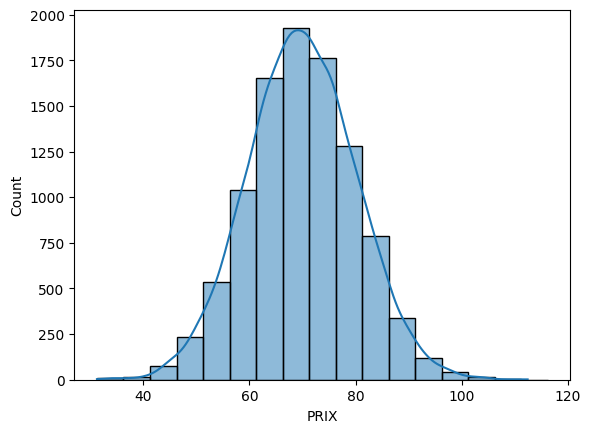

In [16]:
sns.histplot(x = complete['PRIX'], kde = True, binwidth = 5, shrink = 1)

<div style = "text-align: justify">Essayons d'aller plus loin dans l'analyse de la dépense sectorielle : le nombre d'enfants a-t-il un impact sur la dépense alimentaire, vestimentaire, hygiénique ou liée à la maison du client ? Une première approche pour esquisser une réponse est de construire une matrice des corrélations. Celle-ci représente les corrélations entre les différentes variables présentes dans les colonnes de la table. Chaque case de la matrice correspond à la corrélation entre deux variables, allant d'une corrélation de $-$1 à 1. Une corrélation de 1 signifie qu'il y a une corrélation positive parfaite entre les deux variables (c'est-à-dire qu'elles varient ensemble), tandis qu'une corrélation de $-$1 signifie qu'il y a une corrélation négative parfaite (c'est-à-dire qu'une variable augmente quand l'autre diminue). Une corrélation de 0 signifie qu'il n'y a pas de corrélation entre les deux variables.</div>

CPU times: total: 188 ms
Wall time: 424 ms


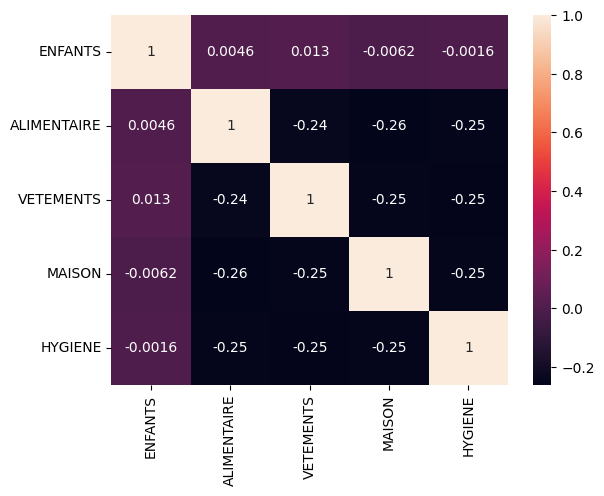

In [17]:
%%time
data = complete[['ENFANTS', 'ALIMENTAIRE', 'VETEMENTS', 'MAISON', 'HYGIENE']]
ax   = sns.heatmap(data.corr(), annot = True)

<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> La bibliothèque <tt>seaborn</tt> est utilisée ici pour créer un diagramme de corrélation à l'aide de la méthode <tt>heatmap</tt>. Cette dernière crée en effet une "carte de chaleur" à partir d'une matrice de données, ici la matrice de corrélation entre les variables sélectionnées. Le code commence par sélectionner les colonnes pertinentes de notre jeu de données (formant ainsi la base de données <tt>data</tt>) puis crée un objet <tt>heatmap</tt> avec la matrice de corrélation, à savoir <tt>data.corr()</tt>. En outre, la méthode <tt>annot</tt> permet d'ajouter des annotations de valeur à chaque case de la matrice de corrélation (valeur des coefficients de corrélation linéaire entre les variables). Ces annotations indiquent ainsi la "force" de la corrélation entre chaque paire de variables. Enfin, l'objet <tt>heatmap</tt> est stocké dans une variable <tt>ax</tt> pour une utilisation ultérieure, par exemple pour sauvegarder la figure ou pour ajouter des titres ou des étiquettes d'axe.</em></div>

<div style = "text-align: justify">Ici, on constate donc que la variable <tt>ALIMENTAIRE</tt> (montant des dépenses alimentaires) est corrélée avec les trois autres variables sectorielles, avec des coefficients de corrélation linéaire de l'ordre de 0.20 à 0.30 en valeur absolue (ces valeurs dépendent toutefois des simulations réalisées). Il convient toutefois de rappeler que des coefficients de corrélation linéaire autour de 0.30 en valeur absolue ne témoignent toutefois que d'une corrélation moyenne entre les variables (il eût fallu des valeurs d'au moins 0.50 en valeur absolue pour parler de corrélations fortes). Ceci étant dit, il est intéressant de noter que les corrélations entre les quatre segments, bien que relativement moyennes, demeurent parfois positives : cela signifie qu'il n'y a pas d'effet de substitution entre les quatre segments (ce n'est pas parce qu'on dépense plus en alimentaire qu'on sacrifie les dépenses d'hygiène, par exemple). Du point du vue marketing, c'est un constat intéressant : il suffit de cibler un seul des quatre segments pour qu'il apparaissent des effets d'entraînement (quoique limités) sur les trois autres. Inversement, lorsque les corrélations entre les dépenses des différents secteurs sont négatives, il conviendra de bien cibler une campagne marketing, car l'augmentation de la recette dans le secteur ciblé sera en moyenne associé à une réduction de la recette des trois autres.</div>

<div style = "text-align: justify">Par ailleurs, les corrélations les plus faibles (en valeurs absolues) sont observées entre la variable <tt>ENFANTS</tt> et les autres variables : ici, le nombre d'enfants ne semble donc pas être corrélé à la dépense, ce qui semble assez contre-intuitif mais s'explique par le fait que les données sont simulées et manquent par conséquent de réalisme. Les résultats (si tant est qu'ils soient fondés sur des bases de données "réelles") peuvent toutefois être utiles pour comprendre comment les différentes variables sont liées les unes aux autres dans la table, et pour prendre des décisions éclairées sur l'analyse de données et les modèles à utiliser. Ainsi, il semble — au vu de nos données simulées — contre-productif de lancer des campagnes marketing spécifiquement ciblées vers les familles, l'impact du nombre d'enfants n'ayant pas de répercussion significative sur la dépense finale. Autant donc cibler une <em>persona</em> plus générale.</div>

## 2.2. Analyse de la dépense totale selon la CSP : ANOVA à un facteur<a class = 'anchor' id = '22'></a>

<div style = "text-align: justify">Ici, on cherche à analyser la formation d'une variable quantitative (le panier moyen) à partir d'une variable qualitative (la CSP). Pour ce faire, on va recourir à une analyse de variance (<em>analysis of variance</em>, ANOVA). L'ANOVA est en effet une technique d'analyse des données courante au côté de la régression linéaire et de l'analyse en composantes principales ou ACP (qui permet d'analyser la formation d'une variable quantitative par une ou plusieurs variables quantitatives), des tests d'indépendance du $\chi^2$ ("khi") et de l'analyse factorielle des correspondances ou AFC (qui permet d'analyser la formation d'une variable qualitative par une variable qualitative) ou de l'analyse des correspondances multiples ou ACM (qui permet d'analyser la formation d'une variable qualitative par plusieurs variables qualitatives). Les techniques d'analyse des données nous permettent en outre d'analyser les "proximités" entre les différentes variables explicatives (le cas échéant) d'une part, et entre les différents individus d'autre part.</div>

<div style = "text-align: justify">Dans notre cas, on cherche à examiner s'il existe un lien entre la CSP et la dépense moyenne. Il existe huit CSP : (i) agriculteurs exploitants, (ii) artisans, commerçants et chefs d'entreprise, (iii) cadres, (iv) professions intermédiaires, (v) employés, (vi) ouvriers, (vii) retraités, (viii) étudiants. Soit $\mu_i$ ("mu") la dépense moyenne parmi les individus de la $i$-ème CSP. On cherche donc à tester l'hypothèse nulle $(H_0):\mu_1=\cdots=\mu_8$ (indépendance entre la dépense moyenne et la CSP) contre l'hypothèse alternative $(H_1)$ selon laquelle il existe au moins deux entiers $i$ et $j$ distincts compris entre 1 et 8 vérifiant $\mu_i\ne \mu_j$ (existence d'un lien entre dépense moyenne et CSP). Avant de mettre en place une ANOVA pour réaliser, il faut vérifier des hypothèses structurelles. Tout d'abord, on doit supposer que la variable à expliquer (ici, la dépense moyenne) suit une distribution normale : c'est structurellement le cas ici, puisqu'on a généré le vecteur des dépenses comme un vecteur normal. En revanche, si ça n'avait pas été le cas, on aurait réalisé un test de Shapiro qui teste l'hypothèse nulle $(H_0^S)$ selon laquelle les dépenses moyennes suivent une loi normale contre l'hypothèse alternative $(H_1^S)$ selon laquelle celles-ci ne sont pas normalement distribués. Le test de Shapiro peut s'implémenter à l'aide du <em>package</em> <tt>scipy.stats</tt>  comme suit :</div>

In [18]:
%%time
from scipy.stats import shapiro

shapiro(complete['PRIX'])

CPU times: total: 15.6 ms
Wall time: 7.03 ms


ShapiroResult(statistic=0.9997847080230713, pvalue=0.44153210520744324)

<div style = "text-align: justify">En général, on réalise des tests au seuil de confiance 95 % (soit au niveau de risque $\alpha$ = 0.05) : c'est ce qu'on fera ici. La règle de décision est alors la suivante : on rejettera l'hypothèse nulle $(H_0^S)$ (et on acceptera donc l'hypothèse alternative $(H_1^S)$) avec un risque d'erreur $\alpha$ ("alpha") si, et seulement si, la $p$-value du test est inférieure à $\alpha$. Ici, la $p$-value est supérieure 0.05 : on ne peut donc pas rejeter l'hypothèse nulle $(H_0^S)$ au niveau de confiance 95 %. Par conséquent, l'hypothèse de normalité de la distribution des dépenses est bien légitime. Mais l'hypothèse de normalité n'est pas la seule à tester : il faut également vérifier l'hypothèse d'homogénéité des variances entre les groupes. Pour tout entier $i$ compris entre 1 et 8, on note $\sigma_i$ ("sigma") le réel positif correspondant à l'écart-type théorique de la dépense (du panier de biens global) pour les individus de la CSP $i$ (c'est-à-dire grossièrement la dispersion de la dépense). On doit alors tester l'hypothèse nulle $(H_0^L):\sigma_1^2=\cdots=\sigma_8^2$ (homogénéité des variances : la dispersion des dépenses ne dépend pas de la CSP) contre l'hypothèse alternative $(H_1^L)$ selon laquelle il existe au moins deux entiers $i$ et $j$ distincts compris entre 1 et 8 vérifiant $\sigma_i^2\ne\sigma_j^2$ (hétéroscédasticité : la dispersion des dépenses diffère significativement entre au moins deux groupes sociaux). Pareille alternative peut être testée à l'aide d'un test de Levene, que l'on implémente comme suit à l'aide du <em>package</em> <tt>bioinfokit</tt> :</div>

In [50]:
#pip install bioinfokit

In [20]:
%%time
from bioinfokit.analys import stat 

lev = stat()
lev.levene(df = melted_db, res_var = 'DEPENSE', xfac_var = 'SECTEUR')
lev.levene_summary

CPU times: total: 2.48 s
Wall time: 7.31 s


,Parameter,Value
0,Test statistics (W),1.4241
1,Degrees of freedom (Df),3.0000
2,p value,0.2335


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ces lignes de code commencent par importer la fonction <tt>levene</tt> depuis le module <tt>scipy.stats</tt>. Ensuite, la liste <tt>alimentaire</tt> est créée en sélectionnant toutes les valeurs de la colonne <tt>DEPENSE</tt> dans la base de données <tt>melted_db</tt> précédemment définie où la colonne <tt>SECTEUR</tt> prend la valeur <tt>ALIMENTAIRE</tt>. On procède de façon analogue pour les listes <tt>vetements</tt>, <tt>maison</tt> et <tt>hygiene</tt>. Ces variables correspondent aux dépenses dans chaque segment de marché de GoldenLine. Par suite, on réalise le test de Levene grâce à la fonction <tt>levene()</tt> qui vérifie si les variances de ces variables sont significativement différentes les unes des autres. Le résultat est stocké dans les variables <tt>lev</tt> et <tt>p_lev</tt>, où <tt>lev</tt> correspond à la statistique du test de Levene et <tt>p_lev</tt> à la $p$-value associée. On rappelle que la $p$-value est la probabilité d'obtenir une statistique de test aussi extrême que celle observée si l'hypothèse nulle était vraie. Dans ce cas-ci, l'hypothèse nulle est que les variances sont égales entre les groupes. Si <tt>p_lev</tt> est très petit (généralement inférieure à 0,05 pour un test au niveau de confiance 95 %), cela indique que nous avons des preuves suffisantes pour rejeter l'hypothèse nulle et conclure que les variances ne sont pas égales.</em></div>

<div style = "text-align: justify">Ici, la $p$-value du test de Levene est très supérieure au niveau de risque 0.05 : on n'est donc incapable de rejeter l'hypothèse nulle $(H_0^L)$ au niveau de risque 5 %. Par conséquent, l'hypothèse d'homogénéité des variances n'est pas illégitime. On a ainsi justifié la légitimité du cadre axiomatique de l'ANOVA : on peut à présent la mettre en œuvre. On va tout d'abord générer le tableau ANOVA à l'aide des <em>packages</em> <tt>researchpy</tt> et <tt>statsmodels</tt>:</div>

In [51]:
#pip install researchpy

In [22]:
%%time
import researchpy as rp

rp.summary_cont(melted_db['DEPENSE'].groupby(melted_db['SECTEUR']), conf = 0.95, decimals = 2)



CPU times: total: 93.8 ms
Wall time: 159 ms


,N,Mean,SD,SE,95% Conf.,Interval
SECTEUR,,,,,,
ALIMENTAIRE,9833,17.44,10.17,0.1,17.24,17.64
HYGIENE,9833,17.36,10.07,0.1,17.16,17.56
MAISON,9833,17.58,10.25,0.1,17.38,17.78
VETEMENTS,9833,17.50,10.10,0.1,17.30,17.70


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code importe tout d'abord le module <tt>researchpy</tt> et utilisent la fonction <tt>summary_cont()</tt> pour calculer des statistiques descriptives pour les données de dépense de chaque secteur d'activité. Plus précisément, la méthode <tt>groupby()</tt> regroupe les données par secteur d'activité (alimentaire, vêtements, maison, hygiène), puis la fonction <tt>summary_cont()</tt> est utilisée pour calculer les statistiques descriptives de la colonne de données de dépense pour chaque groupe. Ces statistiques incluent le nombre d'observations, la moyenne, l'écart-type, le minimum et le maximum. Le résultat de cette fonction est un tableau présentant les statistiques descriptives pour chaque secteur d'activité de manière claire et synthétique. Par ailleurs, le paramètre <tt>conf</tt> indique le niveau de confiance utilisé pour générer l'intervalle de confiance de la moyenne, tandis que le paramètre <tt>decimals</tt> indique le nombre de chiffres après la virgule à afficher.</em></div>

<div style = "text-align: justify">Ainsi, on peut observer que les dépenses moyennes par secteur varient peu, se situant autour de 16-18 euros avec des écart-types assez similaires autour de 9-10 euros. Attention toutefois, il convient de se rappeler que les données ont été simulées ; très probablement auraient apparu des différentes sur des données réelles. Ceci étant dit, on peut s'interroger sur le fait que ces légères différentes sont bien insignifiantes : c'est justement le rôle du test ANOVA que de proposer une question rigoureuse à cette question. Celui-ci s'implémente comme suit :</div>

In [23]:
%%time
import statsmodels.api as sm
from   statsmodels.formula.api import ols

anova     = ols('DEPENSE ~ C(SECTEUR)', data = melted_db).fit()
aov_table = sm.stats.anova_lm(anova, typ = 2)
aov_table

CPU times: total: 375 ms
Wall time: 556 ms


,sum_sq,df,F,PR(>F)
C(SECTEUR),2.626539e+02,3.0,0.850064,0.466297
Residual,4.050540e+06,39328.0,NaN,NaN


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ces lignes de code permettent de réaliser une analyse de variance à un facteur pour comparer les moyennes des dépenses par secteur d'achat. Tout d'abord, la fonction <tt>ols()</tt> du <em>package</em> <tt>statsmodels.formula.api</tt> est utilisée pour ajuster un modèle de régression linéaire sur les données ici de la base de données <tt>melted_db</tt>. Ici, on spécifie la variable à expliquer (<tt>DEPENSE</tt>) et la variable explicative (les différentes modalités associées à la variable qualitative <tt>SECTEUR</tt>). Ensuite, on applique le modèle ajusté à une analyse de variance (ANOVA à un facteur) en utilisant la fonction <tt>sm.stats.anova_lm()</tt>. Ici, on spécifie <tt>typ = 2</tt> pour obtenir une ANOVA de type II (où les effets principaux sont calculés après avoir tenu compte de tous les autres effets dans le modèle). Le résultat est stocké dans une nouvelle base de données nommée <tt>aov_table</tt>. On peut y lire plusieurs informations telles que la somme des carrés, les degrés de liberté, la statistique $F$ de Fisher et la $p$-value associée pour chaque effet et pour le modèle global. Ces informations nous permettent notamment de savoir si les différences entre les moyennes des groupes sont statistiquement significatives ou non.</em></div>

<div style = "text-align: justify">En général (le résultat dépend évidemment de chaque simulation), la $p$-value associée au test de Fisher de l'hypothèse nulle $(H_0):\mu_1=\cdots=\mu_8$ (indépendance entre la dépense moyenne et la CSP) contre l'hypothèse alternative $(H_1):(\exists\,(i,j)\in\{1,\ldots,8\}^2\,\,\,\mu_i\ne\mu_j)$ fournit une $p$-value (<tt>PR(>F)</tt>) supérieure au seuil de 0.05. Par conséquent, on ne peut rejeter l'hypothèse nulle $(H_0)$ au niveau de risque 5 %. On en conclut donc, avec un niveau de confiance de 95 %, que la dépense moyenne des clients ne dépend pas de la CSP. Même si ce résultat découle d'une base de données simulée et non réelle, il pourrait porter en germe des implications marketing utile : puisque la dépense moyenne ne dépend de la CSP, inutile lors de la définition de notre <em>persona</em> de cibler une CSP en particulier. Dans les rares simulations où la $p$-value est inférieure à 0.05, cela signifie qu'il existe au moins deux catégories pour lesquelles la dépense moyenne varie. Problème : l'ANOVA ne nous indique pas lesquelles ; l'utilité pratique pour une équipe marketing est donc limitée. C'est la raison pour laquelle, lorsqu'on met en évidence des effets principaux ou des effets d'interaction, on teste <em>a posteriori</em> chaque paire de catégories pour examiner si leur différence en moyenne est significative ou non : on parle alors de "tests <em>post hoc</em>". Le plus connu est le test HSD (<em>honest standard deviation</em>) de Tukey que l'on implémente à l'aide du <em>package</em> <tt>bioinfokit</tt> comme suit :</div>

In [24]:
%%time
res = stat()
res.tukey_hsd(df = complete, res_var = 'PRIX', xfac_var = 'CSP', anova_model = 'PRIX ~ C(CSP)')
res.tukey_summary.sort_values(by = ['p-value'], ignore_index = True, inplace = True)

res.tukey_summary.head(8)

CPU times: total: 281 ms
Wall time: 471 ms


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Profession intermédiaire,Cadre,0.300148,-0.907277,1.507573,1.065736,0.9
1,Ouvrier,Artisan et apparentés,0.014822,-1.620328,1.649971,0.038861,0.9
2,Retraité,Agriculteur,0.362538,-2.816617,3.541692,0.488896,0.9
3,Retraité,Artisan et apparentés,0.050606,-1.515392,1.616604,0.138544,0.9
4,Retraité,Ouvrier,0.035785,-0.890931,0.962501,0.165548,0.9
5,Employé,Agriculteur,0.048512,-3.271094,3.368117,0.062652,0.9
6,Employé,Artisan et apparentés,0.364632,-1.469790,2.199054,0.852179,0.9
7,Employé,Ouvrier,0.349811,-0.981187,1.680809,1.126758,0.9


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code effectue une analyse de comparaisons multiples de Tukey (tests HSD) pour tester si les moyennes des groupes dans la variable catégorielle <tt>CSP</tt> sont significativement différentes en termes de dépense moyenne. La première ligne crée une instance de la classe <tt>stat()</tt> qui contiendra les résultats de l'analyse statistique. La deuxième ligne appelle la méthode <tt>tukey_hsd()</tt> de l'instance susmentionnée. Cette méthode prend quatre arguments : <tt>df</tt>, la base de données contenant les données ; <tt>res_var</tt>, le nom de la variable continue ; <tt>xfac_var</tt> est le nom de la variable catégorielle ou la liste des variables catégorielles (en cas de tests d'effets d'interaction) ; <tt>anova_model</tt> est le modèle ANOVA à utiliser pour l'analyse. La troisième ligne trie les résultats de Tukey-HSD par ordre croissant de $p$-value, en ignorant l'index existant, et les stocke dans le même objet <tt>tukey_summary</tt> de l'instance susmentionnée. Enfin, la dernière ligne affiche les huit premières lignes du résultat de l'analyse de Tukey-HSD, contenant les comparaisons de paires de groupes, les intervalles de confiance, les différences de moyennes et les $p$-values (avec correction de Bonferroni). Par ailleurs, la table des résultats affiche également la $q$-value : la $q$-value est une mesure statistique qui ajuste la $p$-value pour tenir compte du nombre de tests statistiques effectués simultanément (correction de Bonferroni). Elle est utilisée pour contrôler le taux de fausses découvertes (<em>false discovery rate</em>, FDR) lors de la réalisation de multiples tests statistiques. En d'autres termes, la $q$-value est une mesure de la probabilité qu'un résultat donné soit une fausse découverte. Une $q$-value faible indique donc une forte confiance dans la validité de la découverte. La $q$-value est souvent utilisée en bio-informatique et en génomique pour l'analyse de grandes quantités de données telles que les données d'expression génique, les analyses de protéines et les études d'association génétique.</em></div>

<div style = "text-align: justify">Les tests <em>post hoc</em> fournissent des informations précieuses pour le <em>data scientist</em>, mais difficilement lisibles pour le quidam : elles indiquent pour quelles CSP les différences de dépense moyenne sont statistiquement significatives (ce sont toutes les paires pour lesquelles la $p$-value est inférieure à 0,05 — si l'on souhaite tester ces différences au niveau de confiance 95 %). C'est une donnée marketing fondamentale : si une CSP dépense significativement plus qu'une autre, on peut réfléchir à des stratégies de fidélisation pour que celle-ci continue à rapporter des entrées d'argent à l'entreprise. Inversement, si une CSP dépense significativement moins qu'une autre, il convient de s'interroger sur les raisons de ce comportement, afin éventuellement de créer des campagnes marketing pour "aller chercher" ces consommateurs réticents à dépenser. Mais comment rendre ces conclusions intelligibles et visuelles pour une équipe marketing ? Utilisons pour cela une "boîte à moustaches" (<em>box plot</em>), que l'on peut réaliser à l'aide du <em>package</em> <tt>matplotlib</tt>. Cet outil visuel est construit comme suit :<ol>
    <li>La valeur centrale du graphique est la médiane : il existe autant de valeurs supérieures qu'inférieures à ce seuil au sein de l'échantillon. Non loin de la médiane figure parfois une croix, une étoile ou un triangle (présence facultative) : c'est alors la moyenne empirique de l'échantillon (si les valeurs sont $x_1,\ldots,x_n$, alors la moyenne empirique est tout simplement la valeur $(x_1+\cdots+x_n)/n$).</li> 
    <li>Les bords du rectangle dénotent les quartiles : le bord inférieur forme le premier quartile, c'est-à-dire que 25 % des observations ont des valeurs plus petites et 75 % ont des valeurs plus grandes. De façon analogue, le bord supérieur forme le troisième quartile, c'est-à-dire que 25 % des observations ont des valeurs plus grandes et 75 % ont des valeurs plus petites.</li>
    <li>Les extrémités des moustaches sont calculées en utilisant 1.5 fois l'écart interquartile, c'est-à-dire la différence entre le troisième quartile $Q_3$ et le premier quartile $Q_1$. L'extrémité de la moustache supérieure s'établit donc à $\min(M,Q_3+1.5(Q_3-Q_1))$ et celle de la moustache inférieure à $\max(m,Q_1-1.5(Q_3-Q_1))$, où $m$ et $M$ sont resp. le minimum et le maximum de la série.</li>
    <li>Les valeurs à l'extérieur des moustaches sont représentées par des points. Cela ne signifie pas forcément que ces observations extrêmes dénotent des valeurs aberrantes <em>a priori</em> ; toutefois, cela indique qu'il faudra examiner plus en détail de telles observations pour vérifier qu'elles ne sont pas issues d'une erreur de retranscription des données.</li>
    </ol>
</div>

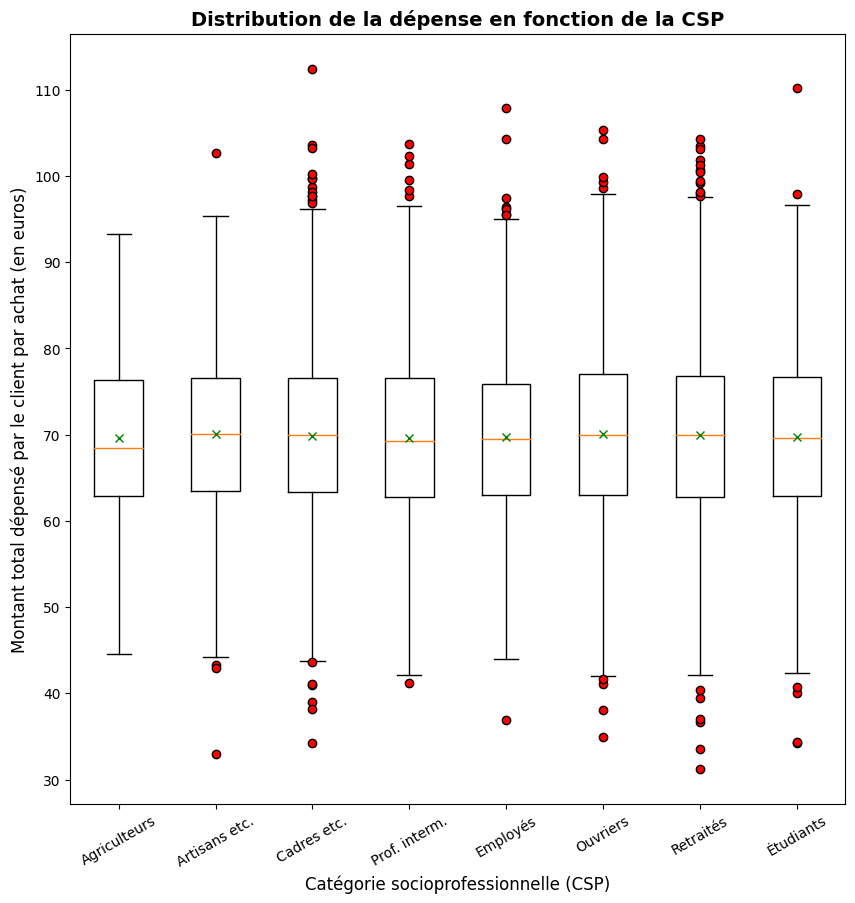

CPU times: total: 719 ms
Wall time: 1.86 s


In [25]:
%%time
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(111)
ax.set_title('Distribution de la dépense en fonction de la CSP', fontsize = 14, weight = 'bold')
ax.set

red_circle = dict(markerfacecolor = 'red',   marker = 'o')
mean_shape = dict(markerfacecolor = 'green', marker = 'x', markeredgecolor = 'green')
data = [complete['PRIX'][complete['CSP'] == 'Agriculteur'], complete['PRIX'][complete['CSP'] == 'Artisan et apparentés'], complete['PRIX'][complete['CSP'] == 'Cadre'], complete['PRIX'][complete['CSP'] == 'Profession intermédiaire'], complete['PRIX'][complete['CSP'] == 'Employé'], complete['PRIX'][complete['CSP'] == 'Ouvrier'], complete['PRIX'][complete['CSP'] == 'Retraité'], complete['PRIX'][complete['CSP'] == 'Étudiant']]
ax.boxplot(data, labels = ['Agriculteurs', 'Artisans etc.', 'Cadres etc.', 'Prof. interm.', 'Employés', 'Ouvriers', 'Retraités', 'Étudiants'], showmeans = True, flierprops = red_circle, meanprops = mean_shape)

plt.xticks(rotation = 30)
plt.xlabel('Catégorie socioprofessionnelle (CSP)', fontsize = 12)
plt.ylabel('Montant total dépensé par le client par achat (en euros)', fontsize = 12)
plt.savefig('Distribution de la dépense en fonction de la CSP.pdf')
plt.show()

<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ces lignes de code permettent de créer un graphique <em>boxplot</em> avec les données de dépenses en fonction de la catégorie socioprofessionnelle (CSP) des clients. Tout d'abord, la bibliothèque <tt>matplotlib.pyplot</tt> est importée sous l'alias <tt>plt</tt>. Ensuite, on crée une figure de taille 10 $\times$ 10 pouces grâce à la commande <tt>fig = plt.figure(figsize = (10,10))</tt>, dans laquelle on ajoute un sous-graphique unique à cette figure avec <tt>ax = fig.add_subplot(111)</tt>. On définit ensuite le titre du graphique avec la commande <tt>ax.set_title()</tt>, puis on définit les étiquettes des axes des abscisses et des ordonnées par les commandes respectives <tt>plt.xlabel()</tt> et <tt>plt.ylabel()</tt>. Après avoir défini les données à représenter, chaque catégorie socioprofessionnelle étant associée à une liste de dépenses, on crée le graphique <em>boxplot</em> à l'aide de la commande <tt>ax.boxplot()</tt> où les données et les étiquettes de chaque catégorie sont fournies ; par ailleurs, l'option <tt>showmeans = True</tt> indique que la moyenne de chaque groupe sera également affichée (sous la forme d'un petit triangle), les points aberrants sont dessinés en utilisant les propriétés de la variable <tt>red_circle</tt>, tandis que les marques de moyenne sont dessinées en utilisant les propriétés de la variable <tt>mean_shape</tt>. Plus précisément, la variable <tt>red_circle</tt> définit un dictionnaire contenant des propriétés pour les points aberrants dans la boîte à moustaches (ici, les points aberrants seront représentés par des cercles rouges, tandis que la variable <tt>mean_shape</tt> définit un dictionnaire contenant des propriétés pour la marque de la moyenne dans la boîte à moustaches (ici, la marque de la moyenne sera représentée par une croix verte avec un contour vert). Par ailleurs, la commande <tt>plt.xticks(rotation = 30)</tt> est utilisée pour faire pivoter les étiquettes de l'axe des abscisses de trente degrés pour améliorer la lisibilité. Enfin, le graphique est sauvegardé en tant que fichier <tt>PDF</tt> puis affiché à l'écran à l'aide des commandes respectives <tt>plt.savefig('###.pdf')</tt> et <tt>plt.show()</tt>.</em></div>

## 2.3. Analyse de la dépense selon le secteur et la CSP : ANOVA à deux facteurs<a class = 'anchor' id = '23'></a>

<div style = "text-align: justify">Maintenant qu'on a montré que la dépense ne dépendait pas de la CSP, on peut approfondir l'étude en se demandant si elle ne dépend pas non plus du segment : (i) alimentaire, (ii) vêtements, (iii) maison ou (iv) hygiène. Autrement dit, on cherche à expliquer la dépense non seulement en fonction du segment mais aussi de la CSP. Il y a donc là deux facteurs explicatifs potentiels : la CSP d'une part et le segment de marché d'autre part. On va donc recourir à une ANOVA à deux facteurs. L'avantage d'une ANOVA à deux facteurs est qu'elle modélise également les éventuels effets d'interaction entre le segment et la CSP : pour tout entier $i$ compris entre 1 et 8 et tout entier $k$ compris entre 1 et 4, on suppose que la dépense moyenne dans le segment $k$ des individus présentant la CSP $i$ s'écrit $m+\mu_i+\nu_k+\rho_{i,k}$ : $m$ représente une "moyenne générale" (<em>grand mean</em>) indépendante de la CSP et du segment ; $\mu_i$ ("mu") dépend uniquement de la CSP (c'est "l'effet principal" de la CSP) ; $\nu_k$ ("nu") dépend uniquement du segment de marché (c'est "l'effet principal" du segment de marché) ; $\rho_{i,k}$ ("rho") dépend à la fois de la CSP et du segment (c'est "l'effet d'interaction" entre CSP et segment de marché). L'objectif de l'ANOVA à deux facteurs est alors de tester trois hypothèses :<ol>
    <li>$(H_0^{C}):(\forall\,i\in\{1,\ldots,8\}\,\,\mu_{i}=0)$ (aucun effet principal de la CSP : toutes les CSP dépensent en moyenne la même chose, à segments de marché identiques) contre l'hypothèse alternative $(H_1^{C})$ selon laquelle il existe au moins un entier $i$ compris entre 1 et 8 vérifiant $\mu_{i}\ne 0$ (présence d'un effet principal de la CSP : toutes choses égales par ailleurs, il existe au moins deux CSP qui présentent des comportements d'achat différents).</li>
        <li>$(H_0^{S}):(\forall\,k\in\{1,\ldots,4\}\,\,\nu_{k}=0)$ (aucun effet principal du segment de marché : les dépenses moyennes en alimentaire, vêtements, maison et hygiène ne varient pas, à CSP identiques) contre l'hypothèse alternative $(H_1^{S})$ selon laquelle il existe au moins un entier $k$ compris entre 1 et 4 vérifiant $\nu_{k}\ne 0$ (présence d'un effet principal du segment : <em>ceteris paribus</em>, il existe au moins deux segments pour laquelle la dépense moyenne diffère).</li>        
        <li>$(H_0^{I}):(\forall\,i\in\{1,\ldots,8\}\,\,\forall\,k\in\{1,\ldots,4\}\,\,\rho_{i,k}=0)$ (absence d'effet d'interaction entre secteur et CSP) contre l'hypothèse alternative $(H_1^{I})$ selon laquelle il existe des entiers $i$ compris entre 1 et 8 et $k$ compris entre 1 et 4 vérifiant $\rho_{i,k}\ne 0$ (présence d'un effet d'interaction entre CSP et segment au moins une fois).</li>
</ol></div>

<div style = "text-align: justify">Le cadre axiomatique de l'ANOVA à deux facteurs est le même que celui à un facteur. D'une part, on doit supposer que la variable à expliquer (ici, la dépense moyenne) suit une distribution normale : on l'a déjà vérifié précédemment. D'autre part, il faut également vérifier l'hypothèse d'homogénéité des variances entre les groupes. Pour tout entier $i$ compris entre 1 et 8 et tout entier $k$ compris entre 1 et 4, on note $\sigma_{i,k}$ le réel positif correspondant à l'écart-type théorique de la dépense dans le segment $k$ pour les individus de la CSP $i$ (c'est-à-dire grossièrement la dispersion de la dépense en catégorie $k$). On doit alors tester l'hypothèse nulle $(H_0^L):(\forall\,(i,j)\in\{1,\ldots,8\}^2\,\,\forall\,(k,\ell)\in\{1,\ldots,4\}^2\,\,\sigma_{i,k}^2=\sigma^2_{j,\ell})$ (homogénéité des variances : la dispersion des dépenses ne dépend pas de la CSP) contre l'hypothèse alternative $(H_1^L)$ selon laquelle il existe au moins deux entiers $i$ et $j$ distincts compris entre 1 et 8 et deux entiers $k$ et $\ell$ distincts compris entre 1 et 4 vérifiant $\sigma_{i,k}^2\ne\sigma_{j,\ell}^2$ (hétéroscédasticité : la dispersion des dépenses diffère significativement entre au moins deux catégories d'individus). Pareille alternative peut là encore être testée à l'aide d'un test de Levene :</div>

In [26]:
lev2 = stat()
lev2.levene(df = melted_db, res_var = 'DEPENSE', xfac_var = ['SECTEUR', 'CSP'])
lev2.levene_summary

,Parameter,Value
0,Test statistics (W),0.8756
1,Degrees of freedom (Df),31.0000
2,p value,0.6649


<div style = "text-align: justify">Ici, la $p$-value du test de Levene est très supérieure au niveau de risque 0.05 : on n'est donc incapable de rejeter l'hypothèse nulle $(H_0^L)$ au niveau de risque 5 %. Par conséquent, l'hypothèse d'homogénéité des variances n'est pas illégitime. On a ainsi justifié la légitimité du cadre axiomatique de l'ANOVA : on peut à présent la mettre en œuvre. On va tout d'abord générer le tableau ANOVA :</div>

In [27]:
%%time
melted_db['GROUPE'] = melted_db['CSP'].apply(str.upper) + ' / ' + melted_db['SECTEUR']
rp.summary_cont(melted_db['DEPENSE'].groupby(melted_db['GROUPE']), conf = 0.95, decimals = 2)



CPU times: total: 93.8 ms
Wall time: 105 ms


,N,Mean,SD,SE,95% Conf.,Interval
GROUPE,,,,,,
AGRICULTEUR / ALIMENTAIRE,97,17.55,10.05,1.02,15.53,19.58
AGRICULTEUR / HYGIENE,97,16.86,10.39,1.05,14.76,18.95
AGRICULTEUR / MAISON,97,18.60,11.20,1.14,16.34,20.85
AGRICULTEUR / VETEMENTS,97,16.63,9.35,0.95,14.74,18.51
ARTISAN ET APPARENTÉS / ALIMENTAIRE,445,18.54,10.97,0.52,17.52,19.56
ARTISAN ET APPARENTÉS / HYGIENE,445,17.61,10.02,0.47,16.67,18.54
ARTISAN ET APPARENTÉS / MAISON,445,17.50,10.15,0.48,16.56,18.45
ARTISAN ET APPARENTÉS / VETEMENTS,445,16.40,9.63,0.46,15.50,17.30
CADRE / ALIMENTAIRE,1339,17.38,10.20,0.28,16.83,17.92


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ces lignes de code permettent de calculer les statistiques descriptives de la variable <tt>DEPENSE</tt> en fonction de deux autres variables <tt>CSP</tt> (catégorie socioprofessionnelle) et <tt>SECTEUR</tt> (segment de vente) de la base de données <tt>melted_db</tt>. La première ligne de code crée une nouvelle colonne à la base de donnée, appelée <tt>GROUPE</tt> en concaténant les données des colonnes <tt>CSP</tt> et <tt>SECTEUR</tt>. Plus précisément, la fonction <tt>apply()</tt> applique la méthode <tt>upper()</tt> à la colonne <tt>CSP</tt> afin de mettre tous les caractères en majuscules, puis ajoute une chaîne de caractères "<tt> / </tt>" et enfin la valeur de la colonne <tt>SECTEUR</tt>. Cela permet de regrouper les données en fonction de ces deux variables pour l'analyse ultérieure. La ligne suivante de code utilise ensuite la fonction <tt>summary_cont()</tt> de la bibliothèque <tt>researchpy</tt> pour calculer les statistiques descriptives (moyenne, écart-type, intervalle de confiance) de la variable <tt>DEPENSE</tt> pour chaque catégorie d'individus. Le paramètre <tt>groupby()</tt> est par ailleurs utilisé pour regrouper les données en fonction de la variable <tt>GROUPE</tt>. Enfin, les paramètres <tt>conf</tt> et <tt>decimals</tt> sont utilisés pour définir respectivement le niveau de confiance (ici, 95 %) pour déterminer l'intervalle de confiance pour les moyennes par catégorie et le nombre de décimales pour l'affichage des résultats.</em></div>

<div style = "text-align: justify">Ainsi, on peut observer que les dépenses moyennes par secteur varient peu, se situant autour de 16-18 euros avec des écart-types assez similaires autour de 9-10 euros. Attention toutefois, il convient de se rappeler que les données ont été simulées ; très probablement auraient apparu des différentes sur des données réelles. Ceci étant dit, on peut s'interroger sur le fait que ces légères différentes sont bien insignifiantes : c'est justement le rôle du test ANOVA que de proposer une question rigoureuse à cette question. Mais ce n'est pas aussi aisé que précédemment : lorsqu'on réalise une ANOVA, il faut en effet vérifier si le nombre d'observations pour chaque modalité $i$ de la CSP et chaque modalité $k$ du secteur est la même ; auquel cas, on parle de "<em>balanced design</em>". C'était trivialement le cas pour l'étude précédente qui ne se focalisait que sur l'impact du secteur : en effet, pour chaque ticket de caisse, on avait généré dans la base de données <tt>melted_db</tt> une ligne pour l'alimentaire, une pour les vêtements, une pour la maison et une pour l'hygiène ; il y avait donc bien le même nombre d'observations pour chacun des secteurs. Mais est-ce toujours le cas maintenant qu'on a rajouté la CSP ? En effet, à aucun moment on a généré autant d'agriculteurs que d'employés. Donc notre ANOVA présentera vraisemblablement un "<em>unbalanced design</em>". Pour tenir compte de ce déséquilibre, on préfèrera non pas réaliser une ANOVA de type II, mais plutôt une ANOVA de type III (on rappelle que, pour les <em>balanced designs</em> les ANOVA de type I, II et III sont parfaitement équivalents ; pour les <em>unbalanced designs</em>, une ANOVA de type II peut aussi être pertinente <em>modulo</em> une réécriture du modèle sans la moyenne générale $m$ et un ajustement des hypothèses à tester, mais on préfèrera en tout cas ne jamais recourir à une ANOVA de type I) :</div>

In [28]:
%%time
anova2     = ols('DEPENSE ~ C(SECTEUR) + C(CSP) + C(SECTEUR):C(CSP)', data = melted_db).fit()
aov_table2 = sm.stats.anova_lm(anova2, typ = 3)
aov_table2

CPU times: total: 1.03 s
Wall time: 2.34 s


,sum_sq,df,F,PR(>F)
Intercept,2.988361e+04,1.0,290.253827,7.489524e-65
C(SECTEUR),2.277892e+02,3.0,0.737491,5.295025e-01
C(CSP),1.422291e+03,7.0,1.973491,5.461116e-02
C(SECTEUR):C(CSP),4.268111e+03,21.0,1.974064,4.939505e-03
Residual,4.046203e+06,39300.0,NaN,NaN


<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code utilise la bibliothèque <tt>statsmodels</tt> pour effectuer une ANOVA à deux facteurs sur la base de données nommée <tt>melted_db</tt>. La fonction spécifique <tt>ols()</tt> de la sous-bibliothèque <tt>formula.api</tt> du <em>package</em> <tt>statsmodels</tt> est ensuite utilisée pour créer un modèle de régression linéaire ordinaire (<em>ordinary least squares</em>, OLS) à partir d'une formule. Ici, la formule est spécifiée comme <tt>DEPENSE ~ C(SECTEUR) + C(CSP) + C(SECTEUR):C(CSP)</tt>, ce qui signifie que la variable dépendante <tt>DEPENSE</tt> est modélisée en fonction des variables indépendantes <tt>SECTEUR</tt> et <tt>CSP</tt>, ainsi que de leur interaction croisée (matérialisée par les deux points entre <tt>C(SECTEUR)</tt> et <tt>C(CSP)</tt>). Par ailleurs, les fonctions <tt>C()</tt> avant chaque variable indiquent qu'elles doivent être traitées comme des variables catégorielles plutôt que continues. Par suite, la méthode <tt>fit()</tt> permet d'ajuster le modèle OLS aux données <tt>melted_db</tt>, et le modèle est ensuite stocké dans une variable appelée <tt>anova2</tt>. Enfin, on utilise une autre fonction de la bibliothèque <tt>statsmodels</tt>, appelée <tt>anova_lm()</tt>, pour calculer une table d'analyse de variance. La table est basée sur le modèle OLS créé précédemment et spécifie le type de calcul de l'ANOVA comme étant de type III. La table d'ANOVA est enfin stockée et affichée dans une variable appelée <tt>aov_table2</tt>.</em></div>

<div style = "text-align: justify">Les résultats ci-dessus présentent la table d'ANOVA avec les sources de variation et les résultats des tests statistiques associés :<ol>
    <li><tt>Intercept</tt> représente l'effet de base (le $m$ du modèle) ou l'effet moyen de toutes les variables qui ne sont pas incluses dans la formule spécifiée. La valeur <tt>sum_sq</tt> indique la somme des carrés de la variation expliquée par l'effet d'interception, tandis que <tt>df</tt> représente le nombre de degrés de liberté associés à cette source de variation.</li>
    <li><tt>C(SECTEUR)</tt> représente l'effet principal de la variable catégorielle <tt>SECTEUR</tt> spécifiée dans la formule (la partie $\mu_i$ du modèle). La valeur <tt>sum_sq</tt> indique la somme des carrés de la variation expliquée par l'effet principal du segment de marché de GoldenLine tandis que <tt>df</tt> représente le nombre de degrés de liberté associés à cette source de variation.</li>
    <li><tt>C(CSP)</tt> représente l'effet principal de la variable catégorielle <tt>CSP</tt> spécifiée dans la formule (la partie $\nu_k$ du modèle). La valeur <tt>sum_sq</tt> indique là encore la somme des carrés de la variation expliquée par l'effet principal de la catégorie sociprofessionnelle, tandis que <tt>df</tt> représente à nouveau le nombre de degrés de liberté associés à cette source de variation.</li>
    <li><tt>C(SECTEUR):C(CSP)</tt> représente l'effet d'interaction entre les variables catégorielles <tt>SECTEUR</tt> et <tt>CSP</tt> (la partie $\rho_{i,k}$ du modèle). La valeur <tt>sum_sq</tt> indique la somme des carrés de la variation expliquée par l'effet d'interaction entre ces deux variables, tandis que <tt>df</tt> représente là encore le nombre de degrés de liberté associés à cette source de variation.</li>
    <li><tt>Residual</tt> représente la variation restante qui n'est pas expliquée par les variables incluses dans la formule. La valeur <tt>sum_sq</tt> indique la somme des carrés de la variation résiduelle non expliquée par le modèle, tandis que <tt>df</tt> représente le nombre de degrés de liberté associés à cette source de variation.</li></ol></div>

<div style = "text-align: justify">En règle générale, l'ANOVA indique une absence d'effet principal du segment de marché et une absence d'effet principal de la catégorie socioprofessionnelle au seuil de confiance 95 % (c'est le cas lorsque la $p$-value associée au test de Fisher correspondant est supérieure à 0.05). De même, en général, il ne semble pas y avoir d'effet d'interaction entre CSP et secteur, car la $p$-value associée au test de significativité global de Fisher de la variable d'interaction est en général supérieure à 0.05. Du point de vue marketing, cette observation est riche d'enseignements, car elle indique qu'il est inutile de cibler un secteur particulier, une CSP particulière ou une CSP vis-à-vis d'un secteur en particulier, étant donné qu'il n'y aura pas <em>a priori</em> d'effet significatif sur la dépense moyenne. Ainsi, les éventuelles variations qu'on peut voir entre CSP et segments (et que l'on peut représenter dans un graphe d'interaction à l'aide du <em>package</em> <tt>statsmodels</tt>) ne doivent se lire que comme des fluctuations liées au hasard. Mais parfois, les simulations peuvent indiquer un effet principal du secteur, un effet principal de la CSP ou un effet d'interaction entre la CSP et le secteur (lorsque le $p$-value de la ligne correspondante du tableau ANOVA est inférieure à 0.05). Le problème est que l'ANOVA n'indique pas précisément quels secteurs, quelles CSP ou quelles catégories d'individus diffèrent significativement ; l'utilité pratique du tableau ANOVA demeure donc limitée. C'est la raison pour laquelle, lorsqu'on met en évidence des effets principaux ou des effets d'interaction, on teste <em>a posteriori</em> chaque paire de catégories pour examiner si leur différence en moyenne est significative ou non à l'aide de "tests <em>post hoc</em>". Utilisons à nouveau le test HSD de Tukey. Commençons par analyser l'effet principal du secteur (on compare les différents $\mu_i$ entre eux — du moins leurs estimations obtenues après régression linéaire) :</div>

In [29]:
%%time
res1 = stat()
res1.tukey_hsd(df = melted_db, res_var = 'DEPENSE', xfac_var = 'SECTEUR', anova_model = 'DEPENSE ~ C(SECTEUR) + C(CSP) + C(SECTEUR):C(CSP)')
res1.tukey_summary.sort_values(by = ['p-value'], ignore_index = True, inplace = True)

res1.tukey_summary.head(8)

CPU times: total: 2.84 s
Wall time: 5.12 s


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,HYGIENE,MAISON,0.222308,-0.149472,0.594087,2.172549,0.417187
1,VETEMENTS,HYGIENE,0.142928,-0.228851,0.514707,1.396794,0.730764
2,ALIMENTAIRE,MAISON,0.142643,-0.229136,0.514422,1.394011,0.731869
3,ALIMENTAIRE,VETEMENTS,0.063264,-0.308516,0.435043,0.618256,0.900000
4,ALIMENTAIRE,HYGIENE,0.079664,-0.292115,0.451444,0.778538,0.900000
5,VETEMENTS,MAISON,0.079380,-0.292400,0.451159,0.775755,0.900000


<div style = "text-align: justify">Poursuivons avec l'analyse de l'effet principal de la CSP (on compare les différents $\nu_k$ entre eux — du moins leurs estimations obtenues après régression linéaire) :</div>

In [30]:
%%time
res2 = stat()
res2.tukey_hsd(df = melted_db, res_var = 'DEPENSE', xfac_var = 'CSP', anova_model = 'DEPENSE ~ C(SECTEUR) + C(CSP) + C(SECTEUR):C(CSP)')
res2.tukey_summary.sort_values(by = ['p-value'], ignore_index = True, inplace = True)

res2.tukey_summary.head(8)

CPU times: total: 2.05 s
Wall time: 3.48 s


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Profession intermédiaire,Cadre,0.075037,-0.527533,0.677607,0.533792,0.9
1,Ouvrier,Artisan et apparentés,0.003705,-0.812322,0.819733,0.019464,0.9
2,Retraité,Agriculteur,0.090634,-1.495935,1.677204,0.244872,0.9
3,Retraité,Artisan et apparentés,0.012652,-0.768866,0.794169,0.069392,0.9
4,Retraité,Ouvrier,0.008946,-0.453535,0.471427,0.082918,0.9
5,Employé,Agriculteur,0.012128,-1.644534,1.668790,0.031380,0.9
6,Employé,Artisan et apparentés,0.091158,-0.824317,1.006633,0.426828,0.9
7,Employé,Ouvrier,0.087453,-0.576787,0.751692,0.564355,0.9


<div style = "text-align: justify">Achevons l'analyse <em>post hoc</em> avec l'analyse de l'effet d'interaction entre la CSP et le segment de marché (on compare les différents $\rho_{i,k}$ entre eux — du moins leurs estimations obtenues après régression linéaire) :</div>

In [31]:
%%time
res3 = stat()
res3.tukey_hsd(df = melted_db, res_var = 'DEPENSE', xfac_var = ['CSP', 'SECTEUR'], anova_model = 'DEPENSE ~ C(SECTEUR) + C(CSP) + C(SECTEUR):C(CSP)')
res3.tukey_summary.sort_values(by = ['p-value'], ignore_index = True, inplace = True)

res3.tukey_summary.head(8)

CPU times: total: 8.83 s
Wall time: 16.7 s


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Employé, VETEMENTS)","(Artisan et apparentés, ALIMENTAIRE)",1.946805,-0.336861,4.230471,4.557748,0.255944
1,"(Employé, VETEMENTS)","(Employé, MAISON)",1.635084,-0.318629,3.588798,4.474451,0.294101
2,"(Artisan et apparentés, ALIMENTAIRE)","(Artisan et apparentés, VETEMENTS)",2.139888,-0.431740,4.711515,4.448805,0.306201
3,"(Employé, MAISON)","(Artisan et apparentés, VETEMENTS)",1.828167,-0.455499,4.111833,4.279999,0.397668
4,"(Étudiant, ALIMENTAIRE)","(Artisan et apparentés, ALIMENTAIRE)",1.683554,-0.451363,3.818470,4.216058,0.434378
5,"(Profession intermédiaire, HYGIENE)","(Artisan et apparentés, ALIMENTAIRE)",1.665901,-0.447647,3.779449,4.214028,0.435522
6,"(Profession intermédiaire, HYGIENE)","(Employé, MAISON)",1.354180,-0.397662,3.106022,4.132777,0.479380
7,"(Étudiant, ALIMENTAIRE)","(Employé, MAISON)",1.371833,-0.405730,3.149397,4.126070,0.482803


<div style = "text-align: justify"><em><b>Quelques commentaires sur ces codes.</b> Ces codes effectuent une analyse de comparaisons multiples de Tukey (tests HSD) pour tester si les moyennes des groupes dans la variable catégorielle <tt>SECTEUR</tt>, puis dans la variable catégorielle <tt>CSP</tt>, et enfin pour les variables catégorielles d'interaction entre le segment de vente et la CSP, sont significativement différentes en termes de dépense moyenne. La première ligne crée une instance de la classe <tt>stat()</tt> qui contiendra les résultats de l'analyse statistique. La deuxième ligne appelle la méthode <tt>tukey_hsd()</tt> de l'instance susmentionnée. Cette méthode prend quatre arguments : <tt>df</tt>, la base de données contenant les données ; <tt>res_var</tt>, le nom de la variable continue ; <tt>xfac_var</tt> est le nom de la variable catégorielle ou la liste des variables catégorielles (en cas de tests d'effets d'interaction) ; <tt>anova_model</tt> est le modèle ANOVA à utiliser pour l'analyse. La troisième ligne trie les résultats de Tukey-HSD par ordre croissant de $p$-value, en ignorant l'index existant, et les stocke dans le même objet <tt>tukey_summary</tt> de l'instance susmentionnée. Enfin, la dernière ligne affiche les huit premières lignes du résultat de l'analyse de Tukey-HSD, contenant les comparaisons de paires de groupes, les intervalles de confiance, les différences de moyennes et les $p$-values (avec correction de Bonferroni). En résumé, ces codes permet d'évaluer les effets principaux et les effets d'interaction en utilisant l'analyse de Tukey-HSD, qui est une méthode commune pour les tests <em>post hoc</em> après une ANOVA. Les résultats sont triés par ordre croissant de $p$-value pour faciliter l'identification des différences significatives entre les groupes.</em></div>

<div style = "text-align: justify">Les tests <em>post hoc</em> fournissent des informations précieuses pour le <em>data scientist</em>, mais difficilement lisibles pour le quidam : elles indiquent pour quelles catégories d'individus les différences de dépense moyenne sont statistiquement significatives (ce sont toutes les paires pour lesquelles la $p$-value est inférieure à 0,05 — si l'on souhaite tester ces différences au niveau de confiance 95 %). C'est une donnée marketing fondamentale : si une catégorie d'individus dépense significativement plus qu'une autre, on peut réfléchir à des stratégies de fidélisation pour que celle-ci continue à rapporter des entrées d'argent à l'entreprise. Inversement, si une catégorie d'individus dépense significativement moins qu'une autre, il convient de s'interroger sur les raisons de ce comportement, afin éventuellement de créer des campagnes marketing pour "aller chercher" ces consommateurs réticents à dépenser. Mais comment rendre ces conclusions intelligibles et visuelles pour une équipe marketing ? L'outil privilégié est un graphique d'interaction : il s'agit d'un type de visualisation de données qui permet de montrer comment l'effet d'une variable indépendante sur une variable dépendante peut varier en fonction d'une ou plusieurs autres variables indépendantes. Plus précisément, il permet de montrer comment les relations entre les variables changent en fonction des niveaux de chaque variable. L'intérêt d'un graphique d'interaction est de pouvoir visualiser les effets conjoints de plusieurs variables sur une variable dépendante. Il peut être utile pour comprendre comment les effets d'une variable indépendante sur une variable dépendante diffèrent en fonction des niveaux d'une autre variable indépendante. Il permet également d'identifier les interactions significatives entre les variables, c'est-à-dire les situations où les effets d'une variable indépendante sur la variable dépendante varient selon les niveaux de l'autre variable indépendante.</div>

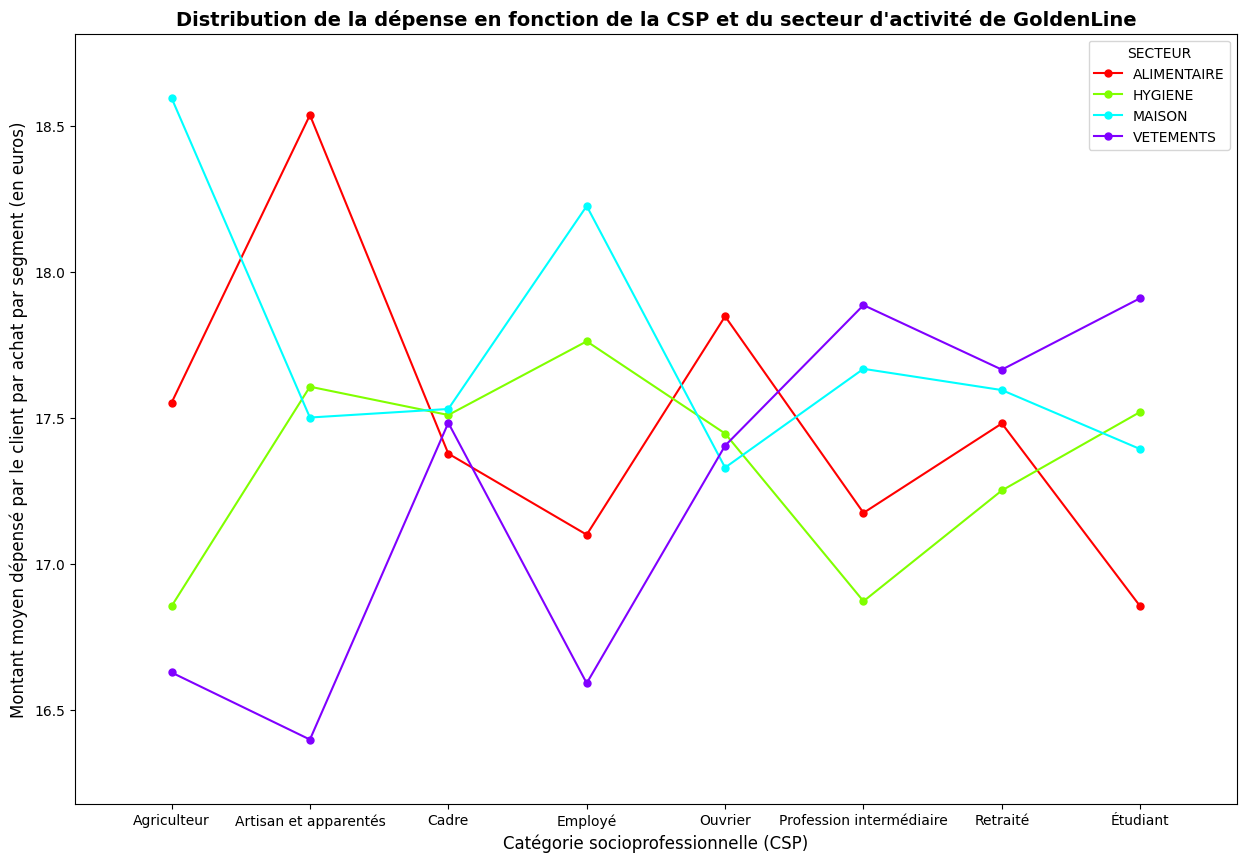

CPU times: total: 516 ms
Wall time: 1.36 s


In [48]:
%%time
from statsmodels.graphics.factorplots import interaction_plot

fig = plt.figure(figsize = (15, 10))
ax  = fig.add_subplot(111)
ax.set_title("Distribution de la dépense en fonction de la CSP et du secteur d'activité de GoldenLine", fontsize = 14, weight = 'bold')
ax.set
fig = interaction_plot(x = melted_db['CSP'], trace = melted_db['SECTEUR'], response = melted_db['DEPENSE'], ms = 10, ax = ax)

plt.xticks(rotation = 0)
plt.xlabel('Catégorie socioprofessionnelle (CSP)', fontsize = 12)
plt.ylabel('Montant moyen dépensé par le client par achat par segment (en euros)', fontsize = 12)
plt.savefig('Distribution de la dépense en fonction de la CSP et du secteur.pdf')
plt.show()

<div style = "text-align: justify"><em><b>Quelques commentaires sur ce code.</b> Ce code permet de créer un graphique d'interaction pour visualiser la relation entre la CSP, le secteur d'activité et la dépense moyenne par achat. La première ligne importe la fonction <tt>interaction_plot()</tt> de la bibliothèque <tt>statsmodels.graphics.factorplots</tt>. Cette fonction permet de créer des graphiques d'interaction. La deuxième ligne crée une figure de taille 15 $\times$ 10 pouces pour le graphique à venir. La troisième ligne crée un objet <tt>ax</tt> dans lequel seront sauvegardées propriétes des axes de la figure. En effet, l'objet <tt>ax</tt> est ensuite utilisé pour définir le titre du graphique avec la fonction <tt>set_title</tt>. Par suite, on crée à l'aide de la fonction <tt>interaction_plot</tt> ledit graphique d'interaction. Les paramètres de la fonction sont les suivants : <tt>x</tt> indique la variable catégorielle à afficher sur l'axe des abscisses (ici, la catégorie socioprofessionnelle), <tt>trace</tt> la variable catégorielle à afficher en différents groupes sur le graphique (ici, le segment de marché), <tt>response</tt> la variable numérique à afficher sur l'axe des ordonnées (ici, le montant moyen dépensé) et <tt>ms</tt> la taille des points sur le graphique. Enfin, les lignes suivantes définissent le format de la figure : <tt>plt.xticks(rotation = 0)</tt> définit l'absence de rotation des étiquettes de l'axe des abscisses, <tt>plt.xlabel</tt> et <tt>plt.ylabel</tt> définissent les étiquettes des axes respectifs des abscisses et des ordonnées, <tt>plt.savefig</tt> enregistre la figure au format <tt>PDF</tt> et <tt>plt.show</tt> l'affiche à l'écran.</em></div>

<div style = "text-align: justify">Attention toutefois à ne pas sur-interpréter le graphique d'interaction ci-dessus : en effet, sur ce graphique d'interaction ne figurent que les moyennes pour chaque catégorie d'individus. Mais la moyenne n'est en aucun cas un indicateur de dispersion des données. Or des différences de moyennes entre deux catégories, même relativement importantes, peuvent en réalité être statistiquement insignifiantes si les données intracatégorielles sont très dispersées. C'est pourquoi, pour interpréter des différences, on préfère utiliser des intervalles de confiance : on dira alors que deux moyennes sont significativement différentes à un niveau de confiance donné si, et seulement si, les intervalles de confiance pour lesdites moyennes au même niveau de confiance ne se recoupent pas. On aimerait dès lors ajouter ces intervalles de confiance au graphique précédent pour éviter les interprétations hâtives. Le problème est que la fonction <tt>interaction_plot()</tt> ne permet pas l'ajout d'une telle option ; pas le choix : il va falloir réencoder la fonction permettant de générer un graphique d'interaction nous-mêmes. Dès lors, on pourra visualiser clairement les catégories dont la dépense moyenne varie significativement : ce seront celles dont les intervalles de confiance tracés ne se recoupent pas. Attention toutefois à ne pas faire preuve d'<em>hubris</em> : autant en sciences "dures", on exige un niveau de confiance de 95 %, de 99,9 % voire de 99,99 % (pour des tests de détection de maladie grave) ; en marketing en revanche, un niveau de confiance de 80 % (<em>i.e.</em> une chance sur cinq d'avoir tort) voire de 75 % (<em>i.e.</em> une chance sur quatre d'avoir tort) est sans doute acceptable. On aurait donc pu réaliser toute l'analyse <em>supra</em> pour un niveau de confiance plus faible (80 % par exemple) que celui choisi dans cette sous-section et la précédente (95 %). C'est pourquoi ci-dessous on affiche les intervalles de confiance à 80 % :</div>

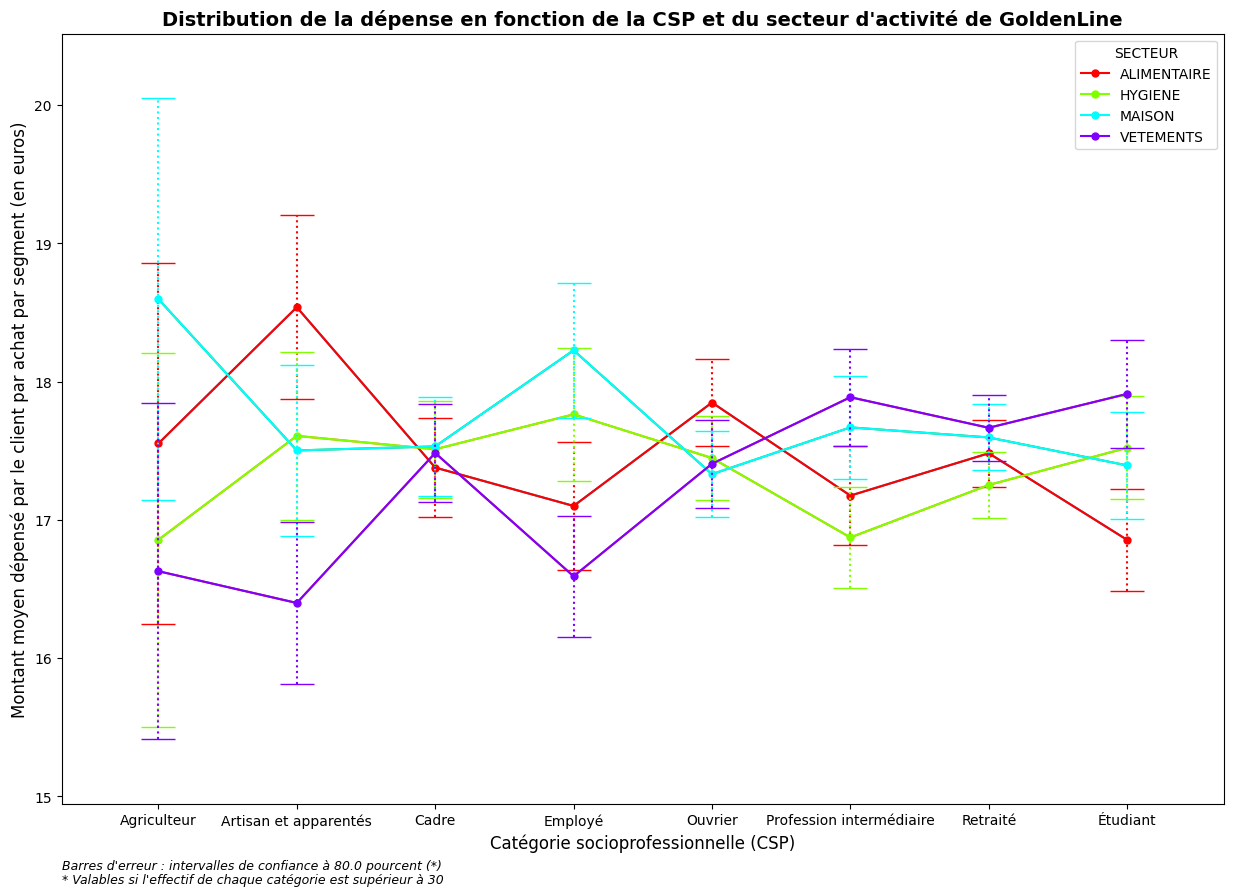

CPU times: total: 953 ms
Wall time: 1.77 s


In [47]:
%%time
import statsmodels.graphics.utils     as     utils
from   statsmodels.compat.python      import lrange
from   statsmodels.graphics.plottools import rainbow
from   scipy.stats import norm
from   scipy.stats import sem

def int_plot(x, trace, response, func = np.mean, ax = None, plottype = 'b', xlabel = None, ylabel = None, colors = None, markers = None, 
             linestyles = None, legendloc = 'best', legendtitle = None, errorbars = False, conf = 0.95, **kwargs):

    fig, ax       = utils.create_mpl_ax(ax)
    response_name = ylabel      or getattr(response, 'name', 'response')
    ylabel        = '%s of %s' % (func.__name__, response_name)
    xlabel        = xlabel      or getattr(x,        'name', 'X')
    legendtitle   = legendtitle or getattr(trace,    'name', 'Trace')
    x_values      = None
    x_levels      = None
    data          = pd.DataFrame(dict(x = x, trace = trace, response = response))
    plot_data     = data.groupby(['trace', 'x']).aggregate(func).reset_index()
    yerr          = data.groupby(['trace', 'x']).aggregate(lambda xx: norm.ppf((1 + conf) / 2) * sem(xx, ddof = 1)).reset_index()
    n_trace       = len(plot_data['trace'].unique())
    linestyles    = ['-'] * n_trace  if linestyles is None else linestyles
    markers       = ['.'] * n_trace  if markers    is None else markers
    colors        = rainbow(n_trace) if colors     is None else colors

    for i, (values, group) in enumerate(plot_data.groupby('trace')):
        label  = str(group['trace'].values[0])
        if errorbars:
            eb = ax.errorbar(group['x'], group['response'], ecolor = colors[i], capsize = 12, barsabove = True, **kwargs, yerr = yerr.loc[yerr['trace'] == values]['response'].values)
            eb[-1][0].set_linestyle('dotted')
        ax.plot(group['x'], group['response'], color = colors[i], marker = markers[i], label = label, linestyle = linestyles[i], **kwargs)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.annotate("Barres d'erreur : intervalles de confiance à %s pourcent (*)" %(100 * conf), (0,0), (0, -40), xycoords = 'axes fraction', textcoords = 'offset points', va = 'top', fontsize = 9, style = 'italic')
    ax.annotate("* Valables si l'effectif de chaque catégorie est supérieur à 30",            (0,0), (0, -50), xycoords = 'axes fraction', textcoords = 'offset points', va = 'top', fontsize = 9, style = 'italic')
    ax.legend(loc = legendloc, title = legendtitle)
    ax.margins(.1)
    if all([x_levels, x_values]):
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_levels)
        
    return fig

fig = plt.figure(figsize = (15, 10))
ax  = fig.add_subplot(111)
ax.set_title("Distribution de la dépense en fonction de la CSP et du secteur d'activité de GoldenLine", fontsize = 14, weight = 'bold')
ax.set
int_plot(x = melted_db['CSP'], trace = melted_db['SECTEUR'], response = melted_db['DEPENSE'], ms = 10, ax = ax, errorbars = True, conf = 0.80)

plt.xticks(rotation = 0)
plt.xlabel('Catégorie socioprofessionnelle (CSP)', fontsize = 12)
plt.ylabel('Montant moyen dépensé par le client par achat par segment (en euros)', fontsize = 12)
plt.savefig('Distribution de la dépense en fonction de la CSP et du secteur (avec barres).pdf')
plt.show()

## 2.4. Quelques perspectives pour approfondir<a class = 'anchor' id = '24'></a>

<div style = "text-align: justify">Cette première analyse des données nous a permis d'appréhender l'impact de deux variables qualitatives (CSP et segment d'activité) sur la formation de la dépense moyenne des clients (simulés) de la société GoldenLine. En pratique, une société dispose dans sa base de données clients d'une myriade d'informations : sexe, code postal, âge, date précise de la facture... Tous ces outils pourrait nous permettre de déterminer quelles catégories de consommateurs sont les plus "loyales". L'enjeu est ainsi de définir les habitudes de consommation des clients. Naturellement, un jeu de données pléthorique (trop de variables explicatives potentielles) pourrait rendre difficile la lecture marketing ; c'est pourquoi on mobilisera sûrement des techniques de réduction des dimensions (ACP notamment). Toutefois, certaines variables nous semblent particulièrement informatives et mériteraient qu'on s'y attarde lors d'études approfondies :<ol>
    <li>Saisonnalité des achats : à quelles périodes achète-t-on le plus ? Répondre à cette question permet de mieux cibler les campagnes marketing dans l'année. En outre, on peut mieux percevoir l'évolution de la composition du panier de bien (poids de chaque segment dans le ticket moyen) au cours de l'année. Des modèles de séries temporelles (ARIMA, GARCH) pourraient alors être mobilisés.</li> 
    <li>Âge et date de naissance : comment adapter l'image et le champ lexical des campagnes marketing pour que celles-ci atteignent le mieux les différentes catégories d'âge ? Remarque-t-on que les clients dépensent plus à l'approche de leur anniversaire ? Auquel cas, leur envoyer une promotion personnalisée pourrait être rentable.</li>
    <li>Code postal : si l'on voit que, sur un même magasin, un code postal est sur-représenté, on pourrait cibler les campagnes publicitaires à l'égard des personnes vivant dans les communes apportant le plus de chiffre d'affaires. On peut également vérifier si les personnes achètent bien dans le magasin le plus proche de chez elles (sinon, pourquoi ce vide d'air pour le magasin le plus proche ?)</li>  
</ol></div>

<div style = "text-align: justify">Au delà de cette analyse interne, l'environnement du marché mérite des études approfondies. Quid des prix moyens pratiqués par la concurrence (des compétences en <em>scraping</em> seront alors nécessaires) ? Comment l'évolution des pratiques des autres magasins non affiliés à GoldenLine affecte-t-elle l'évolution du chiffre d'affaires de cette dernière au cours de l'année ? Quid des fournisseurs ? Y a-t-il un risque de pénurie ou de défaut d'approvisionnement ? La fluctuation des approvisionnements pourrait alors permettre de mettre en œuvre une politique de gestion des stocks plus optimale, cherchant autant que ce peut l'idéal d'une production en flux tendu afin de limiter au plus les dépenses de stockage au cours de l'exercice comptable.</div>